In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria personal

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 227"
       )
tweets = query(cmd)
print(len(tweets))

23634


In [3]:
print(tweets[:20])

[('dental implants',), ('So getting a dental implant is like becoming a piece of ikea furniture that needs assembly. But with heavier-duty tools and less swearing.',), ('Territory Manager - Dental Implants - London - Haye - Helix Recruitment Ltd #WestBritonJobs https://t.co/Mb01mjduNq',), (".-. I'm not gonna be in a good mood for a bit, need major dental surgery because my dental implant has failed. Yay.",), ("RT @DrHadwenTrust: Animals are used to test dental implants. We're funding this work to help replace them: https://t.co/kkyHEY09Vh https://…",), ('Anyone have dental implants? I Need advice\nhttps://t.co/3DBzVaeMvg',), ('Anyone have dental implants? I Need advice https://t.co/oIkcGaiCSt https://t.co/8BUgWKtN5Y',), ("RT @DrHadwenTrust: Animals are used to test dental implants. We're funding this work to help replace them: https://t.co/kkyHEY09Vh https://…",), ('@MichaelT162 @BestFansStLouis Not sure I understand. Is D for "dick" or "dental implant?"',), ("RT @therealsynaca: I'm ra

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

23634


In [6]:
for d in doc_complete[:20]:
    print(d)

dental implants
so getting a dental implant is like becoming a piece of ikea furniture that needs assembly but with heavier duty tools and less swearing 
territory manager dental implants london haye helix recruitment ltd westbritonjobs 
 i m not gonna be in a good mood for a bit need major dental surgery because my dental implant has failed yay 
rt animals are used to test dental implants we re funding this work to help replace them 
anyone have dental implants i need advice 
anyone have dental implants i need advice 
rt animals are used to test dental implants we re funding this work to help replace them 
 not sure i understand is d for dick or dental implant 
rt i m raising money for vet in dire need of dental implants click to donate 
dentists up to the minute mexico city hoard easy circumstances above apico dental implants else besides ivlygv
rt animals are used to test dental implants we re funding this work to help replace them 
dental implant surgery today i feel like my jaw go

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


9453.6
('surgery', 1887)
('teeth', 1771)
('need', 1746)
('best', 1364)
('cost', 1342)
('smile', 1181)
('much', 1175)
('help', 1022)
('would', 997)
('like', 984)
('check', 889)
('money', 759)
('video', 752)
('mouth', 747)
('life', 737)
('tooth', 666)
('used', 651)
('health', 647)
('change', 620)
('country', 606)
('came', 593)
('full', 553)
('knew', 552)
('replace', 551)
('place', 549)
('conversation', 542)
('work', 506)
('raising', 500)
('liked', 496)
('donate', 492)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

[]
['getting', 'like', 'becoming', 'piece', 'ikea', 'furniture', 'needs', 'assembly', 'heavier', 'duty', 'tools', 'less', 'swearing']
['territory', 'manager', 'london', 'haye', 'helix', 'recruitment', 'westbritonjobs']
['gonna', 'good', 'mood', 'need', 'major', 'surgery', 'failed']
['animals', 'used', 'test', 'funding', 'work', 'help', 'replace']
['anyone', 'need', 'advice']
['anyone', 'need', 'advice']
['animals', 'used', 'test', 'funding', 'work', 'help', 'replace']
['sure', 'understand', 'dick']
['raising', 'money', 'dire', 'need', 'click', 'donate']
['dentists', 'minute', 'mexico', 'city', 'hoard', 'easy', 'circumstances', 'apico', 'else', 'besides', 'ivlygv']
['animals', 'used', 'test', 'funding', 'work', 'help', 'replace']
['surgery', 'today', 'feel', 'like']
['nextfoodtrend', 'rectum', 'twice', 'much', 'time']
[]
[]
['right', 'take', 'apple', 'test', 'smileinaday']
['missing', 'tooth', 'impact', 'every', 'aspect', 'life', 'social', 'professional', 'change']
['pleasure', 'fxllfgs

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<23634x12423 sparse matrix of type '<class 'numpy.int32'>'
	with 118047 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [17]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [18]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 20
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 10
INFO:lda:n_words: 120013
INFO:lda:n_topics: 60
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 80
INFO:lda:n_topics: 50
INFO:lda:n_topics: 70
INFO:ld

INFO:lda:<10> log likelihood: -978276
INFO:lda:<10> log likelihood: -981705
INFO:lda:<60> log likelihood: -908078
INFO:lda:<20> log likelihood: -916284
INFO:lda:<30> log likelihood: -900144
INFO:lda:<40> log likelihood: -898266
INFO:lda:<70> log likelihood: -906557
INFO:lda:<50> log likelihood: -893501
INFO:lda:<80> log likelihood: -904699
INFO:lda:<10> log likelihood: -986750
INFO:lda:<40> log likelihood: -890737
INFO:lda:<30> log likelihood: -903376
INFO:lda:<90> log likelihood: -902936
INFO:lda:<30> log likelihood: -898375
INFO:lda:<60> log likelihood: -890329
INFO:lda:<100> log likelihood: -902827
INFO:lda:<20> log likelihood: -921796
INFO:lda:<20> log likelihood: -925769
INFO:lda:<50> log likelihood: -884855
INFO:lda:<110> log likelihood: -901960
INFO:lda:<70> log likelihood: -889206
INFO:lda:<120> log likelihood: -901315
INFO:lda:<10> log likelihood: -992968
INFO:lda:<20> log likelihood: -922512
INFO:lda:<20> log likelihood: -927285
INFO:lda:<40> log likelihood: -887945
INFO:lda:

INFO:lda:<370> log likelihood: -878493
INFO:lda:<100> log likelihood: -864649
INFO:lda:<600> log likelihood: -894921
INFO:lda:<380> log likelihood: -878418
INFO:lda:<610> log likelihood: -894521
INFO:lda:<90> log likelihood: -866331
INFO:lda:<210> log likelihood: -861694
INFO:lda:<280> log likelihood: -868575
INFO:lda:<620> log likelihood: -894403
INFO:lda:<50> log likelihood: -893694
INFO:lda:<390> log likelihood: -878229
INFO:lda:<70> log likelihood: -875100
INFO:lda:<630> log likelihood: -894861
INFO:lda:<170> log likelihood: -863917
INFO:lda:<120> log likelihood: -864446
INFO:lda:<140> log likelihood: -861525
INFO:lda:<90> log likelihood: -869137
INFO:lda:<640> log likelihood: -894762
INFO:lda:<400> log likelihood: -878435
INFO:lda:<290> log likelihood: -868226
INFO:lda:<220> log likelihood: -862628
INFO:lda:<650> log likelihood: -894919
INFO:lda:<40> log likelihood: -911177
INFO:lda:<660> log likelihood: -894307
INFO:lda:<410> log likelihood: -878295
INFO:lda:<110> log likelihood:

INFO:lda:<90> log likelihood: -874174
INFO:lda:<1150> log likelihood: -893758
INFO:lda:<510> log likelihood: -866073
INFO:lda:<710> log likelihood: -876632
INFO:lda:<70> log likelihood: -890593
INFO:lda:<190> log likelihood: -857429
INFO:lda:<1160> log likelihood: -893531
INFO:lda:<310> log likelihood: -858716
INFO:lda:<720> log likelihood: -877276
INFO:lda:<80> log likelihood: -880493
INFO:lda:<1170> log likelihood: -893567
INFO:lda:<390> log likelihood: -860194
INFO:lda:<220> log likelihood: -856288
INFO:lda:<520> log likelihood: -865745
INFO:lda:<1180> log likelihood: -893643
INFO:lda:<170> log likelihood: -856924
INFO:lda:<730> log likelihood: -876892
INFO:lda:<260> log likelihood: -856579
INFO:lda:<1190> log likelihood: -893916
INFO:lda:<160> log likelihood: -858670
INFO:lda:<530> log likelihood: -866251
INFO:lda:<740> log likelihood: -876798
INFO:lda:<400> log likelihood: -860501
INFO:lda:<320> log likelihood: -858284
INFO:lda:<1200> log likelihood: -893956
INFO:lda:<130> log lik

INFO:lda:<1680> log likelihood: -893395
INFO:lda:<180> log likelihood: -857625
INFO:lda:<370> log likelihood: -854472
INFO:lda:<740> log likelihood: -864988
INFO:lda:<450> log likelihood: -856279
INFO:lda:<560> log likelihood: -859232
INFO:lda:<1690> log likelihood: -893533
INFO:lda:<1050> log likelihood: -876280
INFO:lda:<1700> log likelihood: -893672
INFO:lda:<320> log likelihood: -853681
INFO:lda:<750> log likelihood: -864715
INFO:lda:<1060> log likelihood: -876602
INFO:lda:<1710> log likelihood: -893336
INFO:lda:<570> log likelihood: -858780
INFO:lda:<280> log likelihood: -853075
INFO:lda:<1720> log likelihood: -893128
INFO:lda:<460> log likelihood: -856405
INFO:lda:<1070> log likelihood: -876242
INFO:lda:<380> log likelihood: -854692
INFO:lda:<1730> log likelihood: -893680
INFO:lda:<760> log likelihood: -864355
INFO:lda:<1740> log likelihood: -893680
INFO:lda:<1080> log likelihood: -876360
INFO:lda:<580> log likelihood: -858790
INFO:lda:<250> log likelihood: -852260
INFO:lda:<230>

INFO:lda:<1400> log likelihood: -875420
INFO:lda:<430> log likelihood: -851291
INFO:lda:<1000> log likelihood: -864116
INFO:lda:<760> log likelihood: -857796
INFO:lda:<300> log likelihood: -852670
INFO:lda:<330> log likelihood: -850921
INFO:lda:<1410> log likelihood: -875017
INFO:lda:<140> log likelihood: -873051
INFO:lda:<610> log likelihood: -855402
INFO:lda:<1010> log likelihood: -863604
INFO:lda:<180> log likelihood: -859921
INFO:lda:<1420> log likelihood: -875415
INFO:lda:<770> log likelihood: -857934
INFO:lda:<510> log likelihood: -852962
INFO:lda:<1020> log likelihood: -863934
INFO:lda:<1430> log likelihood: -875464
INFO:lda:<380> log likelihood: -851740
INFO:lda:<440> log likelihood: -851669
INFO:lda:<620> log likelihood: -855909
INFO:lda:<1440> log likelihood: -875180
INFO:lda:<780> log likelihood: -858201
INFO:lda:<1030> log likelihood: -865049
INFO:lda:<250> log likelihood: -853979
INFO:lda:<1450> log likelihood: -875555
INFO:lda:<340> log likelihood: -849667
INFO:lda:<520> 

INFO:lda:<990> log likelihood: -857180
INFO:lda:<490> log likelihood: -849635
INFO:lda:<1320> log likelihood: -863930
INFO:lda:<1850> log likelihood: -874950
INFO:lda:<390> log likelihood: -850382
INFO:lda:<800> log likelihood: -854684
INFO:lda:<320> log likelihood: -851944
INFO:lda:<570> log likelihood: -849925
INFO:lda:<1860> log likelihood: -874700
INFO:lda:<1000> log likelihood: -857173
INFO:lda:<1330> log likelihood: -863479
INFO:lda:<670> log likelihood: -852420
INFO:lda:<270> log likelihood: -855005
INFO:lda:<1870> log likelihood: -874277
INFO:lda:<1340> log likelihood: -863723
INFO:lda:<810> log likelihood: -853956
INFO:lda:<440> log likelihood: -848646
INFO:lda:<1010> log likelihood: -857573
INFO:lda:<1880> log likelihood: -875115
INFO:lda:<500> log likelihood: -849935
INFO:lda:<240> log likelihood: -856030
INFO:lda:<1350> log likelihood: -864155
INFO:lda:<580> log likelihood: -850472
INFO:lda:<680> log likelihood: -852280
INFO:lda:<1890> log likelihood: -874807
INFO:lda:<1020

INFO:lda:<340> log likelihood: -854595
INFO:lda:<720> log likelihood: -849967
INFO:lda:<1010> log likelihood: -854004
INFO:lda:<260> log likelihood: -858034
INFO:lda:<300> log likelihood: -854692
INFO:lda:<1270> log likelihood: -856596
INFO:lda:<1680> log likelihood: -863369
INFO:lda:<1020> log likelihood: -854250
INFO:lda:<1690> log likelihood: -863308
INFO:lda:<850> log likelihood: -851191
INFO:lda:<630> log likelihood: -848834
INFO:lda:<410> log likelihood: -849413
INFO:lda:<1280> log likelihood: -856295
INFO:lda:<500> log likelihood: -848112
INFO:lda:<730> log likelihood: -849057
INFO:lda:<560> log likelihood: -847525
INFO:lda:<1700> log likelihood: -863242
INFO:lda:<1030> log likelihood: -853825
INFO:lda:<1290> log likelihood: -856341
INFO:lda:<860> log likelihood: -851919
INFO:lda:<1710> log likelihood: -863160
INFO:lda:<240> log likelihood: -862881
INFO:lda:<640> log likelihood: -849375
INFO:lda:<740> log likelihood: -849424
INFO:lda:<350> log likelihood: -853607
INFO:lda:<1300>

INFO:lda:<770> log likelihood: -848389
INFO:lda:<290> log likelihood: -859309
INFO:lda:<610> log likelihood: -848108
INFO:lda:<370> log likelihood: -851962
INFO:lda:<1570> log likelihood: -855419
INFO:lda:<690> log likelihood: -847759
INFO:lda:<1260> log likelihood: -853156
INFO:lda:<1050> log likelihood: -850800
INFO:lda:<900> log likelihood: -848537
INFO:lda:<1580> log likelihood: -856011
INFO:lda:<780> log likelihood: -848166
INFO:lda:<510> log likelihood: -848260
INFO:lda:<1270> log likelihood: -853520
INFO:lda:<620> log likelihood: -847861
INFO:lda:<1590> log likelihood: -855648
INFO:lda:<1060> log likelihood: -850791
INFO:lda:<430> log likelihood: -852029
INFO:lda:<700> log likelihood: -847137
INFO:lda:<910> log likelihood: -848624
INFO:lda:<1600> log likelihood: -856193
INFO:lda:<1280> log likelihood: -853543
INFO:lda:<330> log likelihood: -855795
INFO:lda:<790> log likelihood: -847940
INFO:lda:<1070> log likelihood: -850817
INFO:lda:<380> log likelihood: -852148
INFO:lda:<1610>

INFO:lda:<850> log likelihood: -846580
INFO:lda:<1940> log likelihood: -854984
INFO:lda:<400> log likelihood: -854388
INFO:lda:<360> log likelihood: -858007
INFO:lda:<460> log likelihood: -851422
INFO:lda:<1560> log likelihood: -853124
INFO:lda:<1110> log likelihood: -848407
INFO:lda:<1950> log likelihood: -855415
INFO:lda:<1300> log likelihood: -850298
INFO:lda:<760> log likelihood: -846767
INFO:lda:<960> log likelihood: -847092
INFO:lda:<1570> log likelihood: -853528
INFO:lda:<1960> log likelihood: -856149
INFO:lda:<860> log likelihood: -846237
INFO:lda:<530> log likelihood: -850238
INFO:lda:<630> log likelihood: -847751
INFO:lda:<1310> log likelihood: -850379
INFO:lda:<1120> log likelihood: -848196
INFO:lda:<1970> log likelihood: -855666
INFO:lda:<1580> log likelihood: -852853
INFO:lda:<970> log likelihood: -846539
INFO:lda:<770> log likelihood: -846355
INFO:lda:<1980> log likelihood: -855575
INFO:lda:<1320> log likelihood: -850657
INFO:lda:<870> log likelihood: -846666
INFO:lda:<11

INFO:lda:<640> log likelihood: -849527
INFO:lda:<760> log likelihood: -846452
INFO:lda:<1040> log likelihood: -845798
INFO:lda:<1580> log likelihood: -849590
INFO:lda:<560> log likelihood: -849077
INFO:lda:<1900> log likelihood: -852457
INFO:lda:<440> log likelihood: -855444
INFO:lda:<1170> log likelihood: -846874
INFO:lda:<490> log likelihood: -851434
INFO:lda:<1360> log likelihood: -847527
INFO:lda:<1910> log likelihood: -853194
INFO:lda:<1590> log likelihood: -850409
INFO:lda:<930> log likelihood: -846342
INFO:lda:<1050> log likelihood: -845521
INFO:lda:<1920> log likelihood: -852145
INFO:lda:<1180> log likelihood: -846658
INFO:lda:<770> log likelihood: -846282
INFO:lda:<1600> log likelihood: -849657
INFO:lda:<650> log likelihood: -848846
INFO:lda:<1370> log likelihood: -848157
INFO:lda:<1930> log likelihood: -852431
INFO:lda:<570> log likelihood: -849426
INFO:lda:<940> log likelihood: -845398
INFO:lda:<1060> log likelihood: -846014
INFO:lda:<1610> log likelihood: -850143
INFO:lda:<

INFO:lda:<1120> log likelihood: -845470
INFO:lda:<590> log likelihood: -850966
INFO:lda:<1910> log likelihood: -849840
INFO:lda:<1260> log likelihood: -845298
INFO:lda:<680> log likelihood: -848496
INFO:lda:<1640> log likelihood: -846627
INFO:lda:<780> log likelihood: -847386
INFO:lda:<1420> log likelihood: -845688
INFO:lda:<1920> log likelihood: -849701
INFO:lda:<1130> log likelihood: -845675
INFO:lda:<930> log likelihood: -845227
INFO:lda:<1650> log likelihood: -847311
INFO:lda:<1270> log likelihood: -845855
INFO:lda:<1430> log likelihood: -846115
INFO:lda:<1930> log likelihood: -849546
INFO:lda:<1660> log likelihood: -846573
INFO:lda:<600> log likelihood: -851929
INFO:lda:<1940> log likelihood: -849520
INFO:lda:<790> log likelihood: -847567
INFO:lda:<1140> log likelihood: -844696
INFO:lda:<540> log likelihood: -853285
INFO:lda:<1440> log likelihood: -846012
INFO:lda:<690> log likelihood: -847618
INFO:lda:<1280> log likelihood: -845216
INFO:lda:<940> log likelihood: -845842
INFO:lda:

INFO:lda:<1720> log likelihood: -845578
INFO:lda:<1120> log likelihood: -844851
INFO:lda:<1360> log likelihood: -845129
INFO:lda:<1530> log likelihood: -844563
INFO:lda:<1990> log likelihood: -846602
INFO:lda:<720> log likelihood: -849804
INFO:lda:<1730> log likelihood: -845784
INFO:lda:<950> log likelihood: -847772
INFO:lda:<1999> log likelihood: -846885
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -846602.429190
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.052664
INFO:lda:<1370> log likelihood: -845025
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 333.575087
INFO:lda:<1540> log likelihood: -844106
INFO:lda:<1130> log likelihood: -844471
INFO:lda:<830> log likelihood: -847530
INFO:lda:<650> log likelihood: -852232
INFO:lda:<1740> log likelihood: -844980
INFO:lda:<1550> log likelihood: -844059
INFO:lda:<1380> log likelihood: -843728
INFO:lda:<1750> log likelihood: -845978
INFO:lda:<730> log likelihood: -849913
INFO:lda:<960> log lik

INFO:lda:<1010> log likelihood: -846251
INFO:lda:<1380> log likelihood: -843830
INFO:lda:<1880> log likelihood: -844211
INFO:lda:<1680> log likelihood: -843067
INFO:lda:<1890> log likelihood: -843148
INFO:lda:<1170> log likelihood: -846588
INFO:lda:<1390> log likelihood: -843906
INFO:lda:<800> log likelihood: -851735
INFO:lda:<1020> log likelihood: -846467
INFO:lda:<890> log likelihood: -849552
INFO:lda:<1690> log likelihood: -843043
INFO:lda:<1900> log likelihood: -843651
INFO:lda:<1400> log likelihood: -843346
INFO:lda:<1180> log likelihood: -846430
INFO:lda:<1700> log likelihood: -843466
INFO:lda:<1910> log likelihood: -843587
INFO:lda:<1030> log likelihood: -846698
INFO:lda:<810> log likelihood: -851276
INFO:lda:<900> log likelihood: -849694
INFO:lda:<1920> log likelihood: -843585
INFO:lda:<1710> log likelihood: -843394
INFO:lda:<1410> log likelihood: -844589
INFO:lda:<1190> log likelihood: -846879
INFO:lda:<1930> log likelihood: -844078
INFO:lda:<1720> log likelihood: -842855
INFO

INFO:lda:<1500> log likelihood: -845417
INFO:lda:<1020> log likelihood: -849191
INFO:lda:<1300> log likelihood: -845347
INFO:lda:<1140> log likelihood: -848606
INFO:lda:<1780> log likelihood: -844299
INFO:lda:<1510> log likelihood: -846046
INFO:lda:<1310> log likelihood: -845718
INFO:lda:<1790> log likelihood: -843748
INFO:lda:<1150> log likelihood: -848044
INFO:lda:<1030> log likelihood: -849747
INFO:lda:<1520> log likelihood: -846397
INFO:lda:<1800> log likelihood: -843227
INFO:lda:<1320> log likelihood: -845418
INFO:lda:<1160> log likelihood: -847777
INFO:lda:<1040> log likelihood: -849450
INFO:lda:<1810> log likelihood: -843557
INFO:lda:<1530> log likelihood: -846358
INFO:lda:<1330> log likelihood: -844649
INFO:lda:<1820> log likelihood: -844069
INFO:lda:<1170> log likelihood: -848329
INFO:lda:<1540> log likelihood: -845748
INFO:lda:<1050> log likelihood: -850177
INFO:lda:<1830> log likelihood: -842892
INFO:lda:<1340> log likelihood: -845387
INFO:lda:<1550> log likelihood: -844850


INFO:lda:<1530> log likelihood: -847353
INFO:lda:<1750> log likelihood: -845384
INFO:lda:<1380> log likelihood: -848327
INFO:lda:<1540> log likelihood: -846518
INFO:lda:<1760> log likelihood: -844073
INFO:lda:<1550> log likelihood: -847273
INFO:lda:<1390> log likelihood: -848858
INFO:lda:<1770> log likelihood: -844420
INFO:lda:<1560> log likelihood: -847116
INFO:lda:<1400> log likelihood: -848128
INFO:lda:<1780> log likelihood: -843948
INFO:lda:<1570> log likelihood: -847927
INFO:lda:<1790> log likelihood: -844663
INFO:lda:<1410> log likelihood: -848107
INFO:lda:<1580> log likelihood: -847396
INFO:lda:<1800> log likelihood: -844819
INFO:lda:<1420> log likelihood: -848241
INFO:lda:<1810> log likelihood: -844049
INFO:lda:<1590> log likelihood: -847506
INFO:lda:<1430> log likelihood: -848427
INFO:lda:<1820> log likelihood: -844607
INFO:lda:<1600> log likelihood: -847819
INFO:lda:<1440> log likelihood: -848572
INFO:lda:<1830> log likelihood: -844920
INFO:lda:<1610> log likelihood: -847409


plotting evaluation results


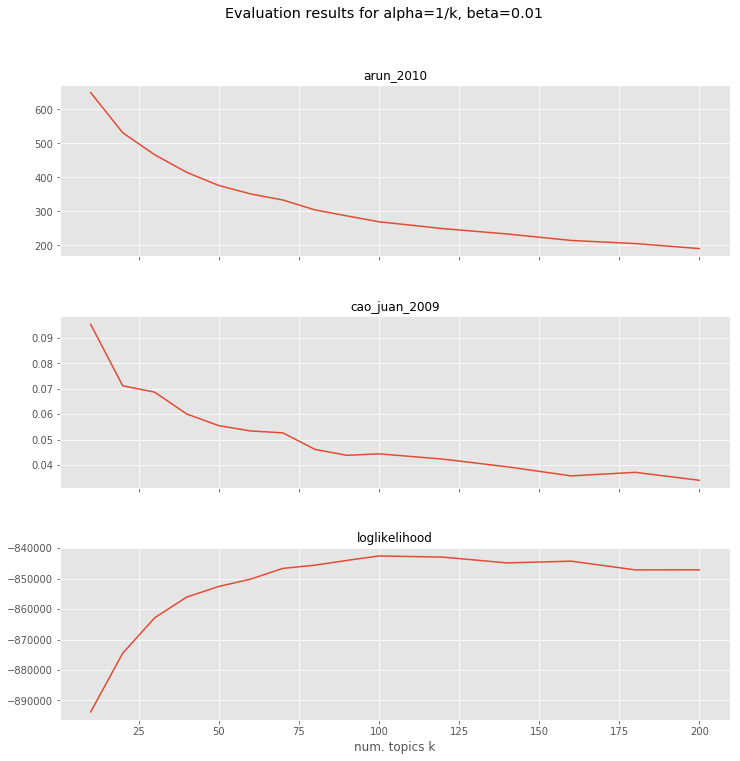

In [19]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [20]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20)) 
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 20
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 10
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_topics: 60
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 80
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 

INFO:lda:<20> log likelihood: -959335
INFO:lda:<30> log likelihood: -932008
INFO:lda:<60> log likelihood: -911135
INFO:lda:<10> log likelihood: -1067332
INFO:lda:<20> log likelihood: -973716
INFO:lda:<50> log likelihood: -912895
INFO:lda:<70> log likelihood: -908965
INFO:lda:<10> log likelihood: -1084459
INFO:lda:<20> log likelihood: -986886
INFO:lda:<10> log likelihood: -1096738
INFO:lda:<80> log likelihood: -906786
INFO:lda:<60> log likelihood: -909742
INFO:lda:<40> log likelihood: -922196
INFO:lda:<30> log likelihood: -940910
INFO:lda:<90> log likelihood: -905412
INFO:lda:<20> log likelihood: -999059
INFO:lda:<70> log likelihood: -908081
INFO:lda:<100> log likelihood: -904450
INFO:lda:<30> log likelihood: -948506
INFO:lda:<10> log likelihood: -1113449
INFO:lda:<50> log likelihood: -917605
INFO:lda:<110> log likelihood: -903778
INFO:lda:<20> log likelihood: -1014432
INFO:lda:<80> log likelihood: -906824
INFO:lda:<30> log likelihood: -963121
INFO:lda:<120> log likelihood: -903687
INFO

INFO:lda:<160> log likelihood: -913960
INFO:lda:<610> log likelihood: -899286
INFO:lda:<390> log likelihood: -898741
INFO:lda:<620> log likelihood: -898824
INFO:lda:<90> log likelihood: -945845
INFO:lda:<270> log likelihood: -903387
INFO:lda:<200> log likelihood: -908557
INFO:lda:<630> log likelihood: -899727
INFO:lda:<400> log likelihood: -899034
INFO:lda:<120> log likelihood: -930650
INFO:lda:<640> log likelihood: -898791
INFO:lda:<140> log likelihood: -920268
INFO:lda:<100> log likelihood: -939351
INFO:lda:<280> log likelihood: -902952
INFO:lda:<170> log likelihood: -914406
INFO:lda:<650> log likelihood: -899373
INFO:lda:<410> log likelihood: -898705
INFO:lda:<80> log likelihood: -956099
INFO:lda:<50> log likelihood: -1005764
INFO:lda:<210> log likelihood: -908560
INFO:lda:<40> log likelihood: -1034360
INFO:lda:<660> log likelihood: -899116
INFO:lda:<420> log likelihood: -898634
INFO:lda:<70> log likelihood: -969966
INFO:lda:<290> log likelihood: -903012
INFO:lda:<670> log likelihoo

INFO:lda:<720> log likelihood: -897895
INFO:lda:<70> log likelihood: -1007647
INFO:lda:<500> log likelihood: -901589
INFO:lda:<100> log likelihood: -966972
INFO:lda:<250> log likelihood: -917476
INFO:lda:<1170> log likelihood: -898852
INFO:lda:<1180> log likelihood: -898930
INFO:lda:<730> log likelihood: -898145
INFO:lda:<380> log likelihood: -905767
INFO:lda:<80> log likelihood: -988981
INFO:lda:<1190> log likelihood: -898752
INFO:lda:<510> log likelihood: -901363
INFO:lda:<310> log likelihood: -911730
INFO:lda:<740> log likelihood: -898063
INFO:lda:<1200> log likelihood: -898821
INFO:lda:<220> log likelihood: -922748
INFO:lda:<1210> log likelihood: -898354
INFO:lda:<390> log likelihood: -906175
INFO:lda:<150> log likelihood: -940125
INFO:lda:<750> log likelihood: -898196
INFO:lda:<190> log likelihood: -929911
INFO:lda:<170> log likelihood: -933504
INFO:lda:<90> log likelihood: -977355
INFO:lda:<520> log likelihood: -901053
INFO:lda:<260> log likelihood: -916309
INFO:lda:<1220> log li

INFO:lda:<1710> log likelihood: -898662
INFO:lda:<550> log likelihood: -905932
INFO:lda:<1060> log likelihood: -898245
INFO:lda:<270> log likelihood: -927573
INFO:lda:<1720> log likelihood: -898282
INFO:lda:<370> log likelihood: -916058
INFO:lda:<1070> log likelihood: -898123
INFO:lda:<1730> log likelihood: -898217
INFO:lda:<740> log likelihood: -901275
INFO:lda:<240> log likelihood: -930364
INFO:lda:<1740> log likelihood: -897843
INFO:lda:<130> log likelihood: -967582
INFO:lda:<560> log likelihood: -904952
INFO:lda:<1080> log likelihood: -897079
INFO:lda:<450> log likelihood: -909885
INFO:lda:<180> log likelihood: -947462
INFO:lda:<1750> log likelihood: -897941
INFO:lda:<320> log likelihood: -920718
INFO:lda:<750> log likelihood: -900873
INFO:lda:<150> log likelihood: -957440
INFO:lda:<1760> log likelihood: -898320
INFO:lda:<220> log likelihood: -937053
INFO:lda:<1090> log likelihood: -897569
INFO:lda:<1770> log likelihood: -897827
INFO:lda:<380> log likelihood: -914374
INFO:lda:<570>

INFO:lda:<290> log likelihood: -936315
INFO:lda:<240> log likelihood: -944839
INFO:lda:<1440> log likelihood: -897123
INFO:lda:<750> log likelihood: -905309
INFO:lda:<600> log likelihood: -909629
INFO:lda:<1000> log likelihood: -899954
INFO:lda:<140> log likelihood: -982227
INFO:lda:<500> log likelihood: -914978
INFO:lda:<1450> log likelihood: -897670
INFO:lda:<370> log likelihood: -926435
INFO:lda:<1010> log likelihood: -900415
INFO:lda:<760> log likelihood: -904715
INFO:lda:<1460> log likelihood: -897654
INFO:lda:<430> log likelihood: -919793
INFO:lda:<330> log likelihood: -928998
INFO:lda:<610> log likelihood: -909711
INFO:lda:<1020> log likelihood: -900019
INFO:lda:<1470> log likelihood: -897460
INFO:lda:<160> log likelihood: -969951
INFO:lda:<510> log likelihood: -915056
INFO:lda:<1030> log likelihood: -900603
INFO:lda:<770> log likelihood: -904276
INFO:lda:<1480> log likelihood: -897889
INFO:lda:<300> log likelihood: -936201
INFO:lda:<620> log likelihood: -909666
INFO:lda:<380> l

INFO:lda:<1320> log likelihood: -900088
INFO:lda:<230> log likelihood: -955558
INFO:lda:<1880> log likelihood: -896552
INFO:lda:<560> log likelihood: -919154
INFO:lda:<990> log likelihood: -904658
INFO:lda:<1330> log likelihood: -900153
INFO:lda:<1890> log likelihood: -897321
INFO:lda:<790> log likelihood: -909782
INFO:lda:<430> log likelihood: -928520
INFO:lda:<660> log likelihood: -913810
INFO:lda:<1000> log likelihood: -903468
INFO:lda:<1900> log likelihood: -896525
INFO:lda:<1340> log likelihood: -899956
INFO:lda:<320> log likelihood: -942318
INFO:lda:<490> log likelihood: -924561
INFO:lda:<1910> log likelihood: -897266
INFO:lda:<270> log likelihood: -948698
INFO:lda:<570> log likelihood: -918145
INFO:lda:<390> log likelihood: -934586
INFO:lda:<800> log likelihood: -908461
INFO:lda:<210> log likelihood: -964182
INFO:lda:<1350> log likelihood: -900339
INFO:lda:<1010> log likelihood: -903965
INFO:lda:<1920> log likelihood: -897578
INFO:lda:<670> log likelihood: -913346
INFO:lda:<1930

INFO:lda:<400> log likelihood: -941090
INFO:lda:<840> log likelihood: -913392
INFO:lda:<1690> log likelihood: -899138
INFO:lda:<1010> log likelihood: -908592
INFO:lda:<720> log likelihood: -917866
INFO:lda:<490> log likelihood: -933885
INFO:lda:<1700> log likelihood: -899748
INFO:lda:<1270> log likelihood: -904387
INFO:lda:<550> log likelihood: -927192
INFO:lda:<620> log likelihood: -924679
INFO:lda:<1710> log likelihood: -899766
INFO:lda:<1020> log likelihood: -907843
INFO:lda:<850> log likelihood: -913405
INFO:lda:<1280> log likelihood: -904387
INFO:lda:<1720> log likelihood: -899019
INFO:lda:<730> log likelihood: -917415
INFO:lda:<350> log likelihood: -947558
INFO:lda:<1030> log likelihood: -908577
INFO:lda:<1290> log likelihood: -904045
INFO:lda:<410> log likelihood: -939766
INFO:lda:<860> log likelihood: -913977
INFO:lda:<1730> log likelihood: -899117
INFO:lda:<300> log likelihood: -951877
INFO:lda:<500> log likelihood: -932879
INFO:lda:<560> log likelihood: -926652
INFO:lda:<630>

INFO:lda:<760> log likelihood: -924431
INFO:lda:<1260> log likelihood: -908858
INFO:lda:<610> log likelihood: -932889
INFO:lda:<680> log likelihood: -927270
INFO:lda:<430> log likelihood: -945989
INFO:lda:<1580> log likelihood: -904129
INFO:lda:<1050> log likelihood: -913644
INFO:lda:<890> log likelihood: -918260
INFO:lda:<1270> log likelihood: -908849
INFO:lda:<1590> log likelihood: -903553
INFO:lda:<370> log likelihood: -950262
INFO:lda:<770> log likelihood: -924405
INFO:lda:<290> log likelihood: -966762
INFO:lda:<1060> log likelihood: -912890
INFO:lda:<330> log likelihood: -958046
INFO:lda:<1600> log likelihood: -904224
INFO:lda:<690> log likelihood: -926735
INFO:lda:<900> log likelihood: -918324
INFO:lda:<1280> log likelihood: -908576
INFO:lda:<620> log likelihood: -932351
INFO:lda:<510> log likelihood: -939539
INFO:lda:<1610> log likelihood: -903316
INFO:lda:<1070> log likelihood: -913016
INFO:lda:<780> log likelihood: -923965
INFO:lda:<1290> log likelihood: -908277
INFO:lda:<440>

INFO:lda:<840> log likelihood: -926092
INFO:lda:<530> log likelihood: -945759
INFO:lda:<620> log likelihood: -938740
INFO:lda:<1950> log likelihood: -903286
INFO:lda:<950> log likelihood: -923094
INFO:lda:<1560> log likelihood: -907286
INFO:lda:<1100> log likelihood: -917452
INFO:lda:<1300> log likelihood: -913144
INFO:lda:<1960> log likelihood: -903340
INFO:lda:<760> log likelihood: -931973
INFO:lda:<850> log likelihood: -926694
INFO:lda:<1570> log likelihood: -907418
INFO:lda:<360> log likelihood: -962952
INFO:lda:<1110> log likelihood: -918215
INFO:lda:<1970> log likelihood: -903381
INFO:lda:<1310> log likelihood: -912508
INFO:lda:<960> log likelihood: -922974
INFO:lda:<460> log likelihood: -948854
INFO:lda:<1580> log likelihood: -907543
INFO:lda:<630> log likelihood: -939184
INFO:lda:<1980> log likelihood: -903259
INFO:lda:<410> log likelihood: -956074
INFO:lda:<1320> log likelihood: -912969
INFO:lda:<540> log likelihood: -945044
INFO:lda:<860> log likelihood: -926744
INFO:lda:<112

INFO:lda:<490> log likelihood: -956613
INFO:lda:<1340> log likelihood: -918234
INFO:lda:<1160> log likelihood: -923081
INFO:lda:<760> log likelihood: -937820
INFO:lda:<1900> log likelihood: -907263
INFO:lda:<650> log likelihood: -944972
INFO:lda:<1580> log likelihood: -912704
INFO:lda:<1910> log likelihood: -908348
INFO:lda:<1350> log likelihood: -916915
INFO:lda:<1040> log likelihood: -926241
INFO:lda:<930> log likelihood: -931902
INFO:lda:<1170> log likelihood: -922484
INFO:lda:<560> log likelihood: -949209
INFO:lda:<440> log likelihood: -961249
INFO:lda:<1920> log likelihood: -907343
INFO:lda:<1590> log likelihood: -913101
INFO:lda:<770> log likelihood: -938581
INFO:lda:<1360> log likelihood: -917395
INFO:lda:<1930> log likelihood: -908053
INFO:lda:<1050> log likelihood: -924510
INFO:lda:<1600> log likelihood: -913508
INFO:lda:<1180> log likelihood: -923725
INFO:lda:<940> log likelihood: -932107
INFO:lda:<500> log likelihood: -956898
INFO:lda:<660> log likelihood: -943934
INFO:lda:<

INFO:lda:<1410> log likelihood: -921725
INFO:lda:<1910> log likelihood: -913397
INFO:lda:<920> log likelihood: -937891
INFO:lda:<1120> log likelihood: -931144
INFO:lda:<1630> log likelihood: -916401
INFO:lda:<1920> log likelihood: -913285
INFO:lda:<1420> log likelihood: -921946
INFO:lda:<790> log likelihood: -944928
INFO:lda:<1260> log likelihood: -924010
INFO:lda:<680> log likelihood: -949634
INFO:lda:<530> log likelihood: -959809
INFO:lda:<1640> log likelihood: -916090
INFO:lda:<600> log likelihood: -955807
INFO:lda:<1930> log likelihood: -912761
INFO:lda:<1130> log likelihood: -931528
INFO:lda:<930> log likelihood: -937962
INFO:lda:<1430> log likelihood: -921803
INFO:lda:<1270> log likelihood: -925004
INFO:lda:<1650> log likelihood: -916482
INFO:lda:<1940> log likelihood: -912686
INFO:lda:<800> log likelihood: -944555
INFO:lda:<1440> log likelihood: -922281
INFO:lda:<1140> log likelihood: -930934
INFO:lda:<1950> log likelihood: -912756
INFO:lda:<1660> log likelihood: -916310
INFO:ld

INFO:lda:<1980> log likelihood: -916547
INFO:lda:<820> log likelihood: -947111
INFO:lda:<1120> log likelihood: -937475
INFO:lda:<640> log likelihood: -957711
INFO:lda:<1720> log likelihood: -921570
INFO:lda:<1990> log likelihood: -916393
INFO:lda:<960> log likelihood: -943931
INFO:lda:<1520> log likelihood: -925805
INFO:lda:<1360> log likelihood: -931353
INFO:lda:<730> log likelihood: -954546
INFO:lda:<1130> log likelihood: -938384
INFO:lda:<1730> log likelihood: -921175
INFO:lda:<1999> log likelihood: -915908
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -916392.537898
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.051772
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 408.253157
INFO:lda:<1530> log likelihood: -925255
INFO:lda:<830> log likelihood: -946867
INFO:lda:<1370> log likelihood: -930986
INFO:lda:<1740> log likelihood: -922340
INFO:lda:<970> log likelihood: -943620
INFO:lda:<650> log likelihood: -958472
INFO:lda:<1140> log like

INFO:lda:<1860> log likelihood: -924482
INFO:lda:<1660> log likelihood: -930737
INFO:lda:<790> log likelihood: -958258
INFO:lda:<890> log likelihood: -954154
INFO:lda:<1010> log likelihood: -948099
INFO:lda:<1180> log likelihood: -943523
INFO:lda:<1870> log likelihood: -925494
INFO:lda:<1390> log likelihood: -937204
INFO:lda:<1670> log likelihood: -930784
INFO:lda:<1880> log likelihood: -925421
INFO:lda:<1680> log likelihood: -930256
INFO:lda:<1020> log likelihood: -947131
INFO:lda:<1190> log likelihood: -943362
INFO:lda:<1400> log likelihood: -936753
INFO:lda:<900> log likelihood: -953667
INFO:lda:<800> log likelihood: -957447
INFO:lda:<1890> log likelihood: -925090
INFO:lda:<1690> log likelihood: -930107
INFO:lda:<1410> log likelihood: -937187
INFO:lda:<1900> log likelihood: -925530
INFO:lda:<1200> log likelihood: -942867
INFO:lda:<1030> log likelihood: -947101
INFO:lda:<1700> log likelihood: -930435
INFO:lda:<1910> log likelihood: -924674
INFO:lda:<810> log likelihood: -956804
INFO:

INFO:lda:<1770> log likelihood: -936149
INFO:lda:<1010> log likelihood: -956537
INFO:lda:<1500> log likelihood: -942361
INFO:lda:<1290> log likelihood: -946768
INFO:lda:<1140> log likelihood: -953077
INFO:lda:<1780> log likelihood: -936216
INFO:lda:<1020> log likelihood: -957096
INFO:lda:<1790> log likelihood: -936106
INFO:lda:<1510> log likelihood: -942742
INFO:lda:<1300> log likelihood: -946662
INFO:lda:<1150> log likelihood: -953238
INFO:lda:<1800> log likelihood: -936096
INFO:lda:<1520> log likelihood: -942934
INFO:lda:<1030> log likelihood: -957385
INFO:lda:<1310> log likelihood: -947553
INFO:lda:<1160> log likelihood: -953647
INFO:lda:<1810> log likelihood: -936680
INFO:lda:<1530> log likelihood: -943588
INFO:lda:<1320> log likelihood: -946583
INFO:lda:<1820> log likelihood: -934809
INFO:lda:<1040> log likelihood: -956537
INFO:lda:<1170> log likelihood: -953291
INFO:lda:<1540> log likelihood: -943084
INFO:lda:<1830> log likelihood: -936895
INFO:lda:<1330> log likelihood: -946214


INFO:lda:<1730> log likelihood: -946150
INFO:lda:<1530> log likelihood: -954141
INFO:lda:<1370> log likelihood: -956934
INFO:lda:<1740> log likelihood: -946331
INFO:lda:<1540> log likelihood: -953135
INFO:lda:<1750> log likelihood: -946517
INFO:lda:<1380> log likelihood: -956272
INFO:lda:<1550> log likelihood: -952528
INFO:lda:<1760> log likelihood: -946034
INFO:lda:<1390> log likelihood: -957758
INFO:lda:<1560> log likelihood: -952467
INFO:lda:<1770> log likelihood: -946274
INFO:lda:<1400> log likelihood: -956165
INFO:lda:<1570> log likelihood: -953031
INFO:lda:<1780> log likelihood: -947242
INFO:lda:<1790> log likelihood: -947160
INFO:lda:<1410> log likelihood: -957131
INFO:lda:<1580> log likelihood: -953150
INFO:lda:<1800> log likelihood: -946443
INFO:lda:<1590> log likelihood: -952719
INFO:lda:<1420> log likelihood: -957018
INFO:lda:<1810> log likelihood: -946900
INFO:lda:<1600> log likelihood: -953013
INFO:lda:<1430> log likelihood: -956375
INFO:lda:<1820> log likelihood: -946941


plotting evaluation results


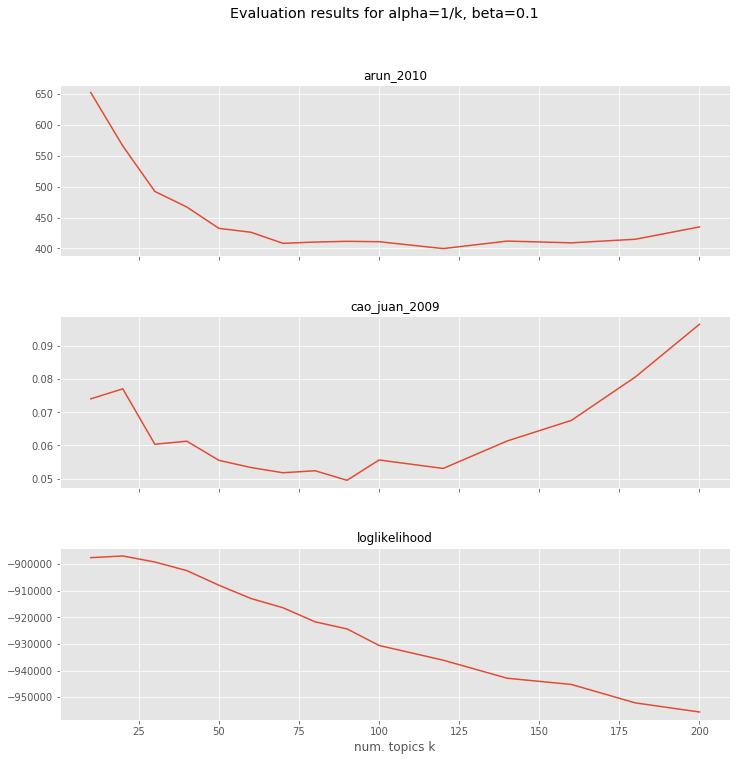

In [21]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [22]:
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
    

cao : 0.04949452477859232 	 90
arun: 399.7325571738522 	 120


### alpha: 0.1 beta: 1/(10*k)

In [23]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 10
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 20
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_topics: 30
INFO:lda:n_topics: 40
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 50
INFO:lda:n_words: 120013
INFO:lda:n_iter: 2000
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 70
INFO:lda:n_documents: 23634
INFO:ld

INFO:lda:<10> log likelihood: -1004797
INFO:lda:<40> log likelihood: -910625
INFO:lda:<70> log likelihood: -906557
INFO:lda:<10> log likelihood: -1000986
INFO:lda:<30> log likelihood: -920247
INFO:lda:<80> log likelihood: -904699
INFO:lda:<20> log likelihood: -938473
INFO:lda:<50> log likelihood: -906531
INFO:lda:<90> log likelihood: -902936
INFO:lda:<10> log likelihood: -1021535
INFO:lda:<30> log likelihood: -925124
INFO:lda:<40> log likelihood: -913650
INFO:lda:<100> log likelihood: -902827
INFO:lda:<20> log likelihood: -948804
INFO:lda:<10> log likelihood: -1025958
INFO:lda:<60> log likelihood: -904293
INFO:lda:<110> log likelihood: -901960
INFO:lda:<20> log likelihood: -952346
INFO:lda:<120> log likelihood: -901315
INFO:lda:<70> log likelihood: -902156
INFO:lda:<10> log likelihood: -1032304
INFO:lda:<50> log likelihood: -910808
INFO:lda:<30> log likelihood: -926995
INFO:lda:<40> log likelihood: -917481
INFO:lda:<130> log likelihood: -900683
INFO:lda:<20> log likelihood: -954613
INF

INFO:lda:<100> log likelihood: -917036
INFO:lda:<160> log likelihood: -899263
INFO:lda:<380> log likelihood: -889541
INFO:lda:<630> log likelihood: -894861
INFO:lda:<40> log likelihood: -975830
INFO:lda:<640> log likelihood: -894762
INFO:lda:<270> log likelihood: -892660
INFO:lda:<210> log likelihood: -895109
INFO:lda:<90> log likelihood: -921486
INFO:lda:<390> log likelihood: -889867
INFO:lda:<650> log likelihood: -894919
INFO:lda:<80> log likelihood: -930950
INFO:lda:<660> log likelihood: -894307
INFO:lda:<280> log likelihood: -892534
INFO:lda:<400> log likelihood: -889293
INFO:lda:<170> log likelihood: -899146
INFO:lda:<670> log likelihood: -894564
INFO:lda:<140> log likelihood: -908640
INFO:lda:<120> log likelihood: -912981
INFO:lda:<220> log likelihood: -894516
INFO:lda:<40> log likelihood: -980894
INFO:lda:<410> log likelihood: -889574
INFO:lda:<680> log likelihood: -894621
INFO:lda:<70> log likelihood: -942973
INFO:lda:<290> log likelihood: -892181
INFO:lda:<110> log likelihood:

INFO:lda:<300> log likelihood: -894258
INFO:lda:<250> log likelihood: -903331
INFO:lda:<1190> log likelihood: -893916
INFO:lda:<500> log likelihood: -889226
INFO:lda:<70> log likelihood: -969056
INFO:lda:<210> log likelihood: -905317
INFO:lda:<720> log likelihood: -887021
INFO:lda:<1200> log likelihood: -893956
INFO:lda:<190> log likelihood: -908660
INFO:lda:<390> log likelihood: -890767
INFO:lda:<1210> log likelihood: -893345
INFO:lda:<510> log likelihood: -889339
INFO:lda:<730> log likelihood: -886499
INFO:lda:<1220> log likelihood: -893966
INFO:lda:<170> log likelihood: -914300
INFO:lda:<310> log likelihood: -894524
INFO:lda:<1230> log likelihood: -894007
INFO:lda:<740> log likelihood: -887382
INFO:lda:<90> log likelihood: -951521
INFO:lda:<150> log likelihood: -922682
INFO:lda:<400> log likelihood: -890858
INFO:lda:<260> log likelihood: -903062
INFO:lda:<520> log likelihood: -889061
INFO:lda:<1240> log likelihood: -894021
INFO:lda:<80> log likelihood: -963345
INFO:lda:<200> log lik

INFO:lda:<1740> log likelihood: -893680
INFO:lda:<1050> log likelihood: -886765
INFO:lda:<560> log likelihood: -889506
INFO:lda:<730> log likelihood: -888622
INFO:lda:<440> log likelihood: -893082
INFO:lda:<1750> log likelihood: -893523
INFO:lda:<180> log likelihood: -930346
INFO:lda:<130> log likelihood: -947092
INFO:lda:<150> log likelihood: -936916
INFO:lda:<1760> log likelihood: -893581
INFO:lda:<310> log likelihood: -902419
INFO:lda:<370> log likelihood: -900350
INFO:lda:<280> log likelihood: -904202
INFO:lda:<1060> log likelihood: -887226
INFO:lda:<1770> log likelihood: -893402
INFO:lda:<740> log likelihood: -888523
INFO:lda:<450> log likelihood: -893064
INFO:lda:<1780> log likelihood: -893261
INFO:lda:<570> log likelihood: -888860
INFO:lda:<1070> log likelihood: -886901
INFO:lda:<1790> log likelihood: -893316
INFO:lda:<220> log likelihood: -917045
INFO:lda:<1800> log likelihood: -893107
INFO:lda:<750> log likelihood: -888230
INFO:lda:<1080> log likelihood: -886511
INFO:lda:<250>

INFO:lda:<600> log likelihood: -891789
INFO:lda:<420> log likelihood: -900010
INFO:lda:<760> log likelihood: -888026
INFO:lda:<990> log likelihood: -887719
INFO:lda:<330> log likelihood: -908500
INFO:lda:<1420> log likelihood: -886417
INFO:lda:<1430> log likelihood: -886748
INFO:lda:<1000> log likelihood: -887974
INFO:lda:<770> log likelihood: -887937
INFO:lda:<180> log likelihood: -943803
INFO:lda:<610> log likelihood: -891841
INFO:lda:<510> log likelihood: -897737
INFO:lda:<1440> log likelihood: -886370
INFO:lda:<380> log likelihood: -902287
INFO:lda:<430> log likelihood: -899549
INFO:lda:<1010> log likelihood: -888130
INFO:lda:<300> log likelihood: -913457
INFO:lda:<780> log likelihood: -888483
INFO:lda:<1450> log likelihood: -886146
INFO:lda:<210> log likelihood: -933007
INFO:lda:<250> log likelihood: -924999
INFO:lda:<340> log likelihood: -908145
INFO:lda:<1020> log likelihood: -888351
INFO:lda:<1460> log likelihood: -886719
INFO:lda:<620> log likelihood: -891611
INFO:lda:<520> lo

INFO:lda:<490> log likelihood: -901511
INFO:lda:<1300> log likelihood: -887653
INFO:lda:<1870> log likelihood: -885829
INFO:lda:<660> log likelihood: -896538
INFO:lda:<320> log likelihood: -922438
INFO:lda:<1880> log likelihood: -886216
INFO:lda:<270> log likelihood: -929574
INFO:lda:<1310> log likelihood: -887699
INFO:lda:<1010> log likelihood: -888397
INFO:lda:<390> log likelihood: -910385
INFO:lda:<560> log likelihood: -897542
INFO:lda:<1890> log likelihood: -886284
INFO:lda:<800> log likelihood: -891442
INFO:lda:<190> log likelihood: -952387
INFO:lda:<1320> log likelihood: -888328
INFO:lda:<1900> log likelihood: -885679
INFO:lda:<440> log likelihood: -907462
INFO:lda:<670> log likelihood: -896583
INFO:lda:<1020> log likelihood: -888216
INFO:lda:<1910> log likelihood: -886392
INFO:lda:<500> log likelihood: -901176
INFO:lda:<1330> log likelihood: -887550
INFO:lda:<810> log likelihood: -890810
INFO:lda:<1920> log likelihood: -886094
INFO:lda:<1340> log likelihood: -887956
INFO:lda:<10

INFO:lda:<710> log likelihood: -896264
INFO:lda:<840> log likelihood: -895252
INFO:lda:<500> log likelihood: -909049
INFO:lda:<300> log likelihood: -936160
INFO:lda:<1670> log likelihood: -887166
INFO:lda:<1010> log likelihood: -891181
INFO:lda:<1280> log likelihood: -887062
INFO:lda:<560> log likelihood: -906113
INFO:lda:<630> log likelihood: -900589
INFO:lda:<240> log likelihood: -950049
INFO:lda:<1680> log likelihood: -887650
INFO:lda:<1020> log likelihood: -890983
INFO:lda:<1290> log likelihood: -887020
INFO:lda:<850> log likelihood: -895205
INFO:lda:<1690> log likelihood: -887263
INFO:lda:<720> log likelihood: -895755
INFO:lda:<410> log likelihood: -918633
INFO:lda:<1300> log likelihood: -887487
INFO:lda:<510> log likelihood: -909437
INFO:lda:<1700> log likelihood: -887582
INFO:lda:<1030> log likelihood: -891327
INFO:lda:<570> log likelihood: -906130
INFO:lda:<640> log likelihood: -900795
INFO:lda:<860> log likelihood: -895704
INFO:lda:<270> log likelihood: -944013
INFO:lda:<1310>

INFO:lda:<880> log likelihood: -896010
INFO:lda:<1570> log likelihood: -887664
INFO:lda:<370> log likelihood: -935016
INFO:lda:<780> log likelihood: -899736
INFO:lda:<690> log likelihood: -905186
INFO:lda:<1260> log likelihood: -890257
INFO:lda:<420> log likelihood: -925214
INFO:lda:<1050> log likelihood: -893726
INFO:lda:<500> log likelihood: -917333
INFO:lda:<1580> log likelihood: -886665
INFO:lda:<890> log likelihood: -895565
INFO:lda:<1590> log likelihood: -886957
INFO:lda:<1270> log likelihood: -890518
INFO:lda:<300> log likelihood: -945977
INFO:lda:<1060> log likelihood: -894101
INFO:lda:<630> log likelihood: -908052
INFO:lda:<790> log likelihood: -899877
INFO:lda:<330> log likelihood: -941895
INFO:lda:<1600> log likelihood: -887778
INFO:lda:<700> log likelihood: -905203
INFO:lda:<1280> log likelihood: -890573
INFO:lda:<900> log likelihood: -894976
INFO:lda:<1070> log likelihood: -894312
INFO:lda:<1610> log likelihood: -886935
INFO:lda:<510> log likelihood: -917404
INFO:lda:<800>

INFO:lda:<1550> log likelihood: -890148
INFO:lda:<460> log likelihood: -933196
INFO:lda:<850> log likelihood: -904473
INFO:lda:<620> log likelihood: -916050
INFO:lda:<520> log likelihood: -923387
INFO:lda:<1100> log likelihood: -895311
INFO:lda:<1300> log likelihood: -893753
INFO:lda:<1940> log likelihood: -886704
INFO:lda:<970> log likelihood: -898434
INFO:lda:<1560> log likelihood: -889328
INFO:lda:<770> log likelihood: -907092
INFO:lda:<1950> log likelihood: -887091
INFO:lda:<1310> log likelihood: -893746
INFO:lda:<860> log likelihood: -905154
INFO:lda:<1110> log likelihood: -895345
INFO:lda:<1570> log likelihood: -889761
INFO:lda:<1960> log likelihood: -886738
INFO:lda:<980> log likelihood: -899570
INFO:lda:<370> log likelihood: -943768
INFO:lda:<630> log likelihood: -916070
INFO:lda:<780> log likelihood: -906691
INFO:lda:<1580> log likelihood: -889751
INFO:lda:<1970> log likelihood: -886062
INFO:lda:<1320> log likelihood: -894155
INFO:lda:<530> log likelihood: -923654
INFO:lda:<47

INFO:lda:<1570> log likelihood: -894254
INFO:lda:<760> log likelihood: -915028
INFO:lda:<490> log likelihood: -937840
INFO:lda:<1340> log likelihood: -894889
INFO:lda:<640> log likelihood: -922275
INFO:lda:<1890> log likelihood: -890146
INFO:lda:<1580> log likelihood: -893801
INFO:lda:<1180> log likelihood: -899388
INFO:lda:<940> log likelihood: -906043
INFO:lda:<1040> log likelihood: -904055
INFO:lda:<1900> log likelihood: -889969
INFO:lda:<1350> log likelihood: -894522
INFO:lda:<1590> log likelihood: -893879
INFO:lda:<570> log likelihood: -932233
INFO:lda:<770> log likelihood: -915624
INFO:lda:<1910> log likelihood: -889769
INFO:lda:<1190> log likelihood: -898370
INFO:lda:<1600> log likelihood: -894355
INFO:lda:<650> log likelihood: -921540
INFO:lda:<1360> log likelihood: -894738
INFO:lda:<950> log likelihood: -906014
INFO:lda:<1050> log likelihood: -903565
INFO:lda:<1920> log likelihood: -889877
INFO:lda:<450> log likelihood: -941743
INFO:lda:<1200> log likelihood: -898485
INFO:lda:

INFO:lda:<1610> log likelihood: -894681
INFO:lda:<1900> log likelihood: -892919
INFO:lda:<780> log likelihood: -921239
INFO:lda:<1430> log likelihood: -898138
INFO:lda:<540> log likelihood: -940421
INFO:lda:<1140> log likelihood: -905354
INFO:lda:<920> log likelihood: -914618
INFO:lda:<1620> log likelihood: -894772
INFO:lda:<1910> log likelihood: -893342
INFO:lda:<1260> log likelihood: -903605
INFO:lda:<690> log likelihood: -931206
INFO:lda:<600> log likelihood: -936486
INFO:lda:<1440> log likelihood: -898182
INFO:lda:<1630> log likelihood: -893860
INFO:lda:<1920> log likelihood: -893306
INFO:lda:<1150> log likelihood: -904750
INFO:lda:<930> log likelihood: -914658
INFO:lda:<790> log likelihood: -920892
INFO:lda:<1270> log likelihood: -903616
INFO:lda:<1930> log likelihood: -894067
INFO:lda:<1640> log likelihood: -893747
INFO:lda:<1450> log likelihood: -898584
INFO:lda:<700> log likelihood: -930599
INFO:lda:<1940> log likelihood: -893924
INFO:lda:<1160> log likelihood: -905185
INFO:lda

INFO:lda:<830> log likelihood: -930756
INFO:lda:<1960> log likelihood: -893341
INFO:lda:<1520> log likelihood: -902784
INFO:lda:<1720> log likelihood: -897230
INFO:lda:<950> log likelihood: -920766
INFO:lda:<1970> log likelihood: -893518
INFO:lda:<1380> log likelihood: -905388
INFO:lda:<1120> log likelihood: -913755
INFO:lda:<1530> log likelihood: -902411
INFO:lda:<1730> log likelihood: -897666
INFO:lda:<1980> log likelihood: -893562
INFO:lda:<730> log likelihood: -933645
INFO:lda:<660> log likelihood: -938733
INFO:lda:<840> log likelihood: -930241
INFO:lda:<1540> log likelihood: -902918
INFO:lda:<1390> log likelihood: -905397
INFO:lda:<1990> log likelihood: -893623
INFO:lda:<1130> log likelihood: -913935
INFO:lda:<960> log likelihood: -920211
INFO:lda:<1740> log likelihood: -897957
INFO:lda:<1550> log likelihood: -902496
INFO:lda:<1999> log likelihood: -893521
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -893623.271272
INFO:tmtoolkit:> evaluation result with metric 

INFO:lda:<1160> log likelihood: -919380
INFO:lda:<1870> log likelihood: -902362
INFO:lda:<1370> log likelihood: -912733
INFO:lda:<800> log likelihood: -937863
INFO:lda:<890> log likelihood: -933610
INFO:lda:<1020> log likelihood: -929546
INFO:lda:<1690> log likelihood: -904134
INFO:lda:<1880> log likelihood: -901736
INFO:lda:<1170> log likelihood: -919294
INFO:lda:<1890> log likelihood: -902090
INFO:lda:<1700> log likelihood: -904498
INFO:lda:<1380> log likelihood: -912403
INFO:lda:<1030> log likelihood: -929271
INFO:lda:<900> log likelihood: -932724
INFO:lda:<1900> log likelihood: -902436
INFO:lda:<1180> log likelihood: -919995
INFO:lda:<1710> log likelihood: -904239
INFO:lda:<810> log likelihood: -937369
INFO:lda:<1390> log likelihood: -912719
INFO:lda:<1910> log likelihood: -902354
INFO:lda:<1720> log likelihood: -904527
INFO:lda:<1040> log likelihood: -929103
INFO:lda:<1190> log likelihood: -919238
INFO:lda:<1400> log likelihood: -913002
INFO:lda:<910> log likelihood: -933570
INFO:

INFO:lda:<1760> log likelihood: -910916
INFO:lda:<1020> log likelihood: -937735
INFO:lda:<1500> log likelihood: -919301
INFO:lda:<1770> log likelihood: -911370
INFO:lda:<1300> log likelihood: -927461
INFO:lda:<1150> log likelihood: -931880
INFO:lda:<1780> log likelihood: -911145
INFO:lda:<1510> log likelihood: -919011
INFO:lda:<1030> log likelihood: -937027
INFO:lda:<1160> log likelihood: -930980
INFO:lda:<1310> log likelihood: -927781
INFO:lda:<1790> log likelihood: -910918
INFO:lda:<1520> log likelihood: -918732
INFO:lda:<1040> log likelihood: -936795
INFO:lda:<1800> log likelihood: -911372
INFO:lda:<1320> log likelihood: -927525
INFO:lda:<1530> log likelihood: -918512
INFO:lda:<1170> log likelihood: -931769
INFO:lda:<1810> log likelihood: -911660
INFO:lda:<1540> log likelihood: -918452
INFO:lda:<1330> log likelihood: -927633
INFO:lda:<1050> log likelihood: -936363
INFO:lda:<1180> log likelihood: -932058
INFO:lda:<1820> log likelihood: -911060
INFO:lda:<1550> log likelihood: -918186


INFO:lda:<1370> log likelihood: -934950
INFO:lda:<1730> log likelihood: -924988
INFO:lda:<1550> log likelihood: -931301
INFO:lda:<1380> log likelihood: -934724
INFO:lda:<1740> log likelihood: -925244
INFO:lda:<1560> log likelihood: -930278
INFO:lda:<1390> log likelihood: -934746
INFO:lda:<1750> log likelihood: -925419
INFO:lda:<1570> log likelihood: -930967
INFO:lda:<1760> log likelihood: -926030
INFO:lda:<1400> log likelihood: -934820
INFO:lda:<1580> log likelihood: -929989
INFO:lda:<1770> log likelihood: -925565
INFO:lda:<1410> log likelihood: -934881
INFO:lda:<1590> log likelihood: -930884
INFO:lda:<1780> log likelihood: -925498
INFO:lda:<1420> log likelihood: -935337
INFO:lda:<1790> log likelihood: -926242
INFO:lda:<1600> log likelihood: -931093
INFO:lda:<1800> log likelihood: -925277
INFO:lda:<1430> log likelihood: -935382
INFO:lda:<1610> log likelihood: -930438
INFO:lda:<1810> log likelihood: -925078
INFO:lda:<1620> log likelihood: -930660
INFO:lda:<1440> log likelihood: -935371


plotting evaluation results


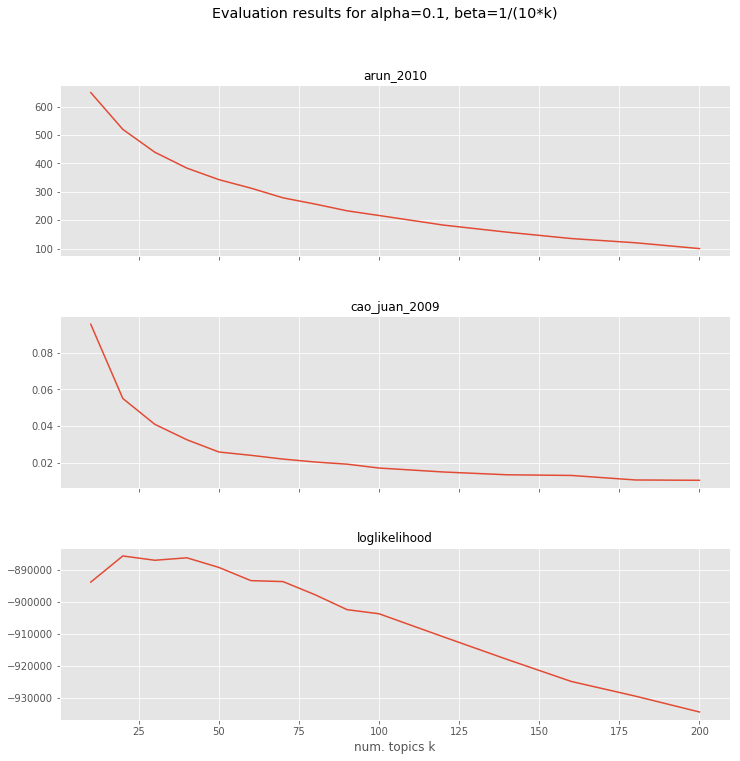

In [24]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 0.1 beta: 0.001

In [25]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 10
INFO:lda:n_topics: 20
INFO:lda:n_topics: 30
INFO:lda:n_documents: 23634
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 23634
INFO:lda:n_topics: 40
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 50
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_topics: 70
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
IN

INFO:lda:<60> log likelihood: -942073
INFO:lda:<10> log likelihood: -1003396
INFO:lda:<30> log likelihood: -936803
INFO:lda:<20> log likelihood: -946672
INFO:lda:<70> log likelihood: -941065
INFO:lda:<10> log likelihood: -1004450
INFO:lda:<50> log likelihood: -930350
INFO:lda:<10> log likelihood: -1021535
INFO:lda:<80> log likelihood: -939718
INFO:lda:<30> log likelihood: -935520
INFO:lda:<60> log likelihood: -927433
INFO:lda:<90> log likelihood: -938073
INFO:lda:<20> log likelihood: -952395
INFO:lda:<40> log likelihood: -931103
INFO:lda:<10> log likelihood: -1020176
INFO:lda:<20> log likelihood: -954583
INFO:lda:<100> log likelihood: -936630
INFO:lda:<70> log likelihood: -926099
INFO:lda:<110> log likelihood: -935474
INFO:lda:<30> log likelihood: -935588
INFO:lda:<50> log likelihood: -927839
INFO:lda:<10> log likelihood: -1029228
INFO:lda:<40> log likelihood: -928994
INFO:lda:<120> log likelihood: -934618
INFO:lda:<80> log likelihood: -924505
INFO:lda:<20> log likelihood: -957858
INFO

INFO:lda:<380> log likelihood: -908175
INFO:lda:<100> log likelihood: -922380
INFO:lda:<90> log likelihood: -923933
INFO:lda:<610> log likelihood: -918893
INFO:lda:<270> log likelihood: -908262
INFO:lda:<120> log likelihood: -916366
INFO:lda:<140> log likelihood: -914419
INFO:lda:<620> log likelihood: -918908
INFO:lda:<390> log likelihood: -907921
INFO:lda:<80> log likelihood: -930950
INFO:lda:<630> log likelihood: -918835
INFO:lda:<170> log likelihood: -908638
INFO:lda:<280> log likelihood: -908162
INFO:lda:<210> log likelihood: -905840
INFO:lda:<640> log likelihood: -918904
INFO:lda:<400> log likelihood: -907647
INFO:lda:<50> log likelihood: -958754
INFO:lda:<40> log likelihood: -974120
INFO:lda:<650> log likelihood: -919174
INFO:lda:<70> log likelihood: -938409
INFO:lda:<410> log likelihood: -907582
INFO:lda:<660> log likelihood: -918620
INFO:lda:<290> log likelihood: -907773
INFO:lda:<220> log likelihood: -905380
INFO:lda:<130> log likelihood: -914237
INFO:lda:<150> log likelihood:

INFO:lda:<1160> log likelihood: -915816
INFO:lda:<120> log likelihood: -929878
INFO:lda:<220> log likelihood: -908589
INFO:lda:<80> log likelihood: -955079
INFO:lda:<380> log likelihood: -900410
INFO:lda:<1170> log likelihood: -915900
INFO:lda:<170> log likelihood: -916427
INFO:lda:<510> log likelihood: -904198
INFO:lda:<720> log likelihood: -904638
INFO:lda:<260> log likelihood: -907404
INFO:lda:<1180> log likelihood: -915984
INFO:lda:<90> log likelihood: -947941
INFO:lda:<190> log likelihood: -913950
INFO:lda:<310> log likelihood: -903131
INFO:lda:<150> log likelihood: -922682
INFO:lda:<1190> log likelihood: -916110
INFO:lda:<390> log likelihood: -899654
INFO:lda:<730> log likelihood: -904295
INFO:lda:<520> log likelihood: -903516
INFO:lda:<1200> log likelihood: -915698
INFO:lda:<1210> log likelihood: -915456
INFO:lda:<740> log likelihood: -904718
INFO:lda:<230> log likelihood: -907522
INFO:lda:<320> log likelihood: -903066
INFO:lda:<530> log likelihood: -904080
INFO:lda:<1220> log l

INFO:lda:<1040> log likelihood: -902434
INFO:lda:<1700> log likelihood: -914784
INFO:lda:<130> log likelihood: -942796
INFO:lda:<150> log likelihood: -932081
INFO:lda:<740> log likelihood: -901509
INFO:lda:<1710> log likelihood: -914529
INFO:lda:<560> log likelihood: -897539
INFO:lda:<1050> log likelihood: -902317
INFO:lda:<450> log likelihood: -900288
INFO:lda:<1720> log likelihood: -914606
INFO:lda:<280> log likelihood: -909936
INFO:lda:<380> log likelihood: -904125
INFO:lda:<1730> log likelihood: -914566
INFO:lda:<1060> log likelihood: -902354
INFO:lda:<250> log likelihood: -912395
INFO:lda:<220> log likelihood: -917045
INFO:lda:<750> log likelihood: -901685
INFO:lda:<1740> log likelihood: -914376
INFO:lda:<180> log likelihood: -924950
INFO:lda:<570> log likelihood: -897370
INFO:lda:<1070> log likelihood: -902258
INFO:lda:<120> log likelihood: -949001
INFO:lda:<1750> log likelihood: -914319
INFO:lda:<460> log likelihood: -899877
INFO:lda:<330> log likelihood: -905129
INFO:lda:<1760>

INFO:lda:<1400> log likelihood: -901077
INFO:lda:<430> log likelihood: -902446
INFO:lda:<240> log likelihood: -921251
INFO:lda:<1410> log likelihood: -900506
INFO:lda:<1000> log likelihood: -899422
INFO:lda:<760> log likelihood: -895124
INFO:lda:<140> log likelihood: -951147
INFO:lda:<510> log likelihood: -902296
INFO:lda:<1420> log likelihood: -901101
INFO:lda:<610> log likelihood: -897381
INFO:lda:<1430> log likelihood: -901007
INFO:lda:<160> log likelihood: -945511
INFO:lda:<1010> log likelihood: -899961
INFO:lda:<440> log likelihood: -902713
INFO:lda:<770> log likelihood: -895736
INFO:lda:<380> log likelihood: -906744
INFO:lda:<1440> log likelihood: -901179
INFO:lda:<340> log likelihood: -910362
INFO:lda:<180> log likelihood: -939522
INFO:lda:<300> log likelihood: -913457
INFO:lda:<520> log likelihood: -901747
INFO:lda:<1020> log likelihood: -899788
INFO:lda:<620> log likelihood: -897934
INFO:lda:<210> log likelihood: -928049
INFO:lda:<1450> log likelihood: -901701
INFO:lda:<780> l

INFO:lda:<790> log likelihood: -896592
INFO:lda:<1310> log likelihood: -898447
INFO:lda:<270> log likelihood: -924977
INFO:lda:<990> log likelihood: -894309
INFO:lda:<1860> log likelihood: -900769
INFO:lda:<230> log likelihood: -936764
INFO:lda:<320> log likelihood: -918530
INFO:lda:<1320> log likelihood: -898646
INFO:lda:<670> log likelihood: -900582
INFO:lda:<1870> log likelihood: -900982
INFO:lda:<1000> log likelihood: -894196
INFO:lda:<800> log likelihood: -896951
INFO:lda:<1880> log likelihood: -901317
INFO:lda:<390> log likelihood: -910385
INFO:lda:<440> log likelihood: -908102
INFO:lda:<1330> log likelihood: -898350
INFO:lda:<580> log likelihood: -901725
INFO:lda:<500> log likelihood: -904583
INFO:lda:<1890> log likelihood: -901080
INFO:lda:<1010> log likelihood: -894581
INFO:lda:<680> log likelihood: -900276
INFO:lda:<1340> log likelihood: -898463
INFO:lda:<1900> log likelihood: -901002
INFO:lda:<810> log likelihood: -896775
INFO:lda:<210> log likelihood: -941924
INFO:lda:<1020

INFO:lda:<1670> log likelihood: -897606
INFO:lda:<1270> log likelihood: -893195
INFO:lda:<260> log likelihood: -939087
INFO:lda:<1010> log likelihood: -895786
INFO:lda:<490> log likelihood: -909606
INFO:lda:<630> log likelihood: -902982
INFO:lda:<1680> log likelihood: -898035
INFO:lda:<850> log likelihood: -898883
INFO:lda:<730> log likelihood: -901102
INFO:lda:<1280> log likelihood: -892809
INFO:lda:<1690> log likelihood: -897790
INFO:lda:<410> log likelihood: -916985
INFO:lda:<1020> log likelihood: -896019
INFO:lda:<560> log likelihood: -907295
INFO:lda:<1290> log likelihood: -893200
INFO:lda:<1700> log likelihood: -897637
INFO:lda:<860> log likelihood: -899903
INFO:lda:<740> log likelihood: -900779
INFO:lda:<500> log likelihood: -909049
INFO:lda:<640> log likelihood: -902213
INFO:lda:<1710> log likelihood: -897389
INFO:lda:<1030> log likelihood: -895693
INFO:lda:<1300> log likelihood: -893439
INFO:lda:<350> log likelihood: -923516
INFO:lda:<1720> log likelihood: -897296
INFO:lda:<87

INFO:lda:<1040> log likelihood: -897959
INFO:lda:<1250> log likelihood: -895122
INFO:lda:<1580> log likelihood: -892195
INFO:lda:<780> log likelihood: -901167
INFO:lda:<610> log likelihood: -907756
INFO:lda:<290> log likelihood: -943854
INFO:lda:<900> log likelihood: -901070
INFO:lda:<690> log likelihood: -906083
INFO:lda:<1260> log likelihood: -895555
INFO:lda:<1590> log likelihood: -892608
INFO:lda:<1050> log likelihood: -898764
INFO:lda:<1600> log likelihood: -892263
INFO:lda:<1270> log likelihood: -895040
INFO:lda:<510> log likelihood: -915353
INFO:lda:<790> log likelihood: -901358
INFO:lda:<910> log likelihood: -901101
INFO:lda:<1060> log likelihood: -898532
INFO:lda:<430> log likelihood: -922085
INFO:lda:<1610> log likelihood: -892441
INFO:lda:<620> log likelihood: -908355
INFO:lda:<700> log likelihood: -906350
INFO:lda:<370> log likelihood: -932489
INFO:lda:<1280> log likelihood: -895365
INFO:lda:<330> log likelihood: -936826
INFO:lda:<1620> log likelihood: -891942
INFO:lda:<920

INFO:lda:<1280> log likelihood: -897507
INFO:lda:<1550> log likelihood: -894306
INFO:lda:<1960> log likelihood: -890817
INFO:lda:<360> log likelihood: -942428
INFO:lda:<850> log likelihood: -905203
INFO:lda:<1110> log likelihood: -900276
INFO:lda:<760> log likelihood: -907355
INFO:lda:<1970> log likelihood: -890312
INFO:lda:<400> log likelihood: -935120
INFO:lda:<1560> log likelihood: -894094
INFO:lda:<1290> log likelihood: -897793
INFO:lda:<970> log likelihood: -899307
INFO:lda:<1980> log likelihood: -890843
INFO:lda:<1570> log likelihood: -894243
INFO:lda:<1120> log likelihood: -900170
INFO:lda:<630> log likelihood: -914320
INFO:lda:<530> log likelihood: -920868
INFO:lda:<1300> log likelihood: -897621
INFO:lda:<860> log likelihood: -905837
INFO:lda:<1990> log likelihood: -890584
INFO:lda:<1580> log likelihood: -894282
INFO:lda:<770> log likelihood: -907092
INFO:lda:<460> log likelihood: -930083
INFO:lda:<980> log likelihood: -899464
INFO:lda:<1130> log likelihood: -900093
INFO:lda:<1

INFO:lda:<1570> log likelihood: -897666
INFO:lda:<1890> log likelihood: -893785
INFO:lda:<1040> log likelihood: -905280
INFO:lda:<440> log likelihood: -941346
INFO:lda:<760> log likelihood: -912739
INFO:lda:<1360> log likelihood: -899421
INFO:lda:<1900> log likelihood: -893727
INFO:lda:<1580> log likelihood: -897500
INFO:lda:<1180> log likelihood: -900221
INFO:lda:<930> log likelihood: -905804
INFO:lda:<1050> log likelihood: -904622
INFO:lda:<1910> log likelihood: -893631
INFO:lda:<1590> log likelihood: -898148
INFO:lda:<560> log likelihood: -929326
INFO:lda:<1370> log likelihood: -899541
INFO:lda:<650> log likelihood: -919312
INFO:lda:<490> log likelihood: -933430
INFO:lda:<1920> log likelihood: -893770
INFO:lda:<1190> log likelihood: -899460
INFO:lda:<770> log likelihood: -912956
INFO:lda:<1600> log likelihood: -897871
INFO:lda:<1060> log likelihood: -904820
INFO:lda:<940> log likelihood: -906043
INFO:lda:<1380> log likelihood: -899503
INFO:lda:<1930> log likelihood: -894253
INFO:lda

INFO:lda:<1410> log likelihood: -899364
INFO:lda:<1640> log likelihood: -898890
INFO:lda:<1110> log likelihood: -905494
INFO:lda:<1910> log likelihood: -896656
INFO:lda:<1270> log likelihood: -904207
INFO:lda:<1420> log likelihood: -898886
INFO:lda:<1650> log likelihood: -898901
INFO:lda:<1920> log likelihood: -896548
INFO:lda:<590> log likelihood: -931943
INFO:lda:<930> log likelihood: -911965
INFO:lda:<1120> log likelihood: -905633
INFO:lda:<1280> log likelihood: -903938
INFO:lda:<790> log likelihood: -918101
INFO:lda:<1660> log likelihood: -899216
INFO:lda:<680> log likelihood: -927470
INFO:lda:<1430> log likelihood: -899663
INFO:lda:<1930> log likelihood: -896914
INFO:lda:<540> log likelihood: -940034
INFO:lda:<1670> log likelihood: -899214
INFO:lda:<1940> log likelihood: -896797
INFO:lda:<1290> log likelihood: -904013
INFO:lda:<1130> log likelihood: -905162
INFO:lda:<1440> log likelihood: -898973
INFO:lda:<940> log likelihood: -911978
INFO:lda:<1950> log likelihood: -896959
INFO:l

INFO:lda:<1340> log likelihood: -905725
INFO:lda:<1720> log likelihood: -898642
INFO:lda:<820> log likelihood: -926354
INFO:lda:<1540> log likelihood: -904067
INFO:lda:<650> log likelihood: -937552
INFO:lda:<1999> log likelihood: -897651
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -897587.751398
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.022070
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 280.112442
INFO:lda:<1120> log likelihood: -912343
INFO:lda:<1350> log likelihood: -905152
INFO:lda:<1730> log likelihood: -898423
INFO:lda:<1550> log likelihood: -903194
INFO:lda:<960> log likelihood: -917440
INFO:lda:<720> log likelihood: -930123
INFO:lda:<1740> log likelihood: -898824
INFO:lda:<1360> log likelihood: -905526
INFO:lda:<830> log likelihood: -927821
INFO:lda:<1130> log likelihood: -912087
INFO:lda:<1560> log likelihood: -903890
INFO:lda:<660> log likelihood: -937696
INFO:lda:<1750> log likelihood: -898858
INFO:lda:<970> log like

INFO:lda:<1010> log likelihood: -926330
INFO:lda:<1890> log likelihood: -903149
INFO:lda:<800> log likelihood: -937085
INFO:lda:<1660> log likelihood: -904996
INFO:lda:<1180> log likelihood: -917934
INFO:lda:<1380> log likelihood: -911215
INFO:lda:<890> log likelihood: -929104
INFO:lda:<1900> log likelihood: -903132
INFO:lda:<1670> log likelihood: -904023
INFO:lda:<1020> log likelihood: -926524
INFO:lda:<1390> log likelihood: -911332
INFO:lda:<1910> log likelihood: -903086
INFO:lda:<1190> log likelihood: -917289
INFO:lda:<1680> log likelihood: -904706
INFO:lda:<810> log likelihood: -936081
INFO:lda:<900> log likelihood: -929439
INFO:lda:<1920> log likelihood: -903092
INFO:lda:<1030> log likelihood: -925960
INFO:lda:<1400> log likelihood: -911315
INFO:lda:<1690> log likelihood: -904134
INFO:lda:<1200> log likelihood: -917124
INFO:lda:<1930> log likelihood: -903177
INFO:lda:<1700> log likelihood: -904498
INFO:lda:<1410> log likelihood: -911656
INFO:lda:<820> log likelihood: -936139
INFO:

INFO:lda:<1770> log likelihood: -910173
INFO:lda:<1500> log likelihood: -917263
INFO:lda:<1140> log likelihood: -928159
INFO:lda:<1300> log likelihood: -924167
INFO:lda:<1780> log likelihood: -910418
INFO:lda:<1030> log likelihood: -936532
INFO:lda:<1510> log likelihood: -916940
INFO:lda:<1150> log likelihood: -928042
INFO:lda:<1310> log likelihood: -924759
INFO:lda:<1790> log likelihood: -910375
INFO:lda:<1520> log likelihood: -916521
INFO:lda:<1040> log likelihood: -936154
INFO:lda:<1800> log likelihood: -910440
INFO:lda:<1160> log likelihood: -927548
INFO:lda:<1320> log likelihood: -924873
INFO:lda:<1530> log likelihood: -916238
INFO:lda:<1810> log likelihood: -910035
INFO:lda:<1050> log likelihood: -934659
INFO:lda:<1330> log likelihood: -924377
INFO:lda:<1170> log likelihood: -927244
INFO:lda:<1540> log likelihood: -916405
INFO:lda:<1820> log likelihood: -910657
INFO:lda:<1340> log likelihood: -924119
INFO:lda:<1830> log likelihood: -910585
INFO:lda:<1060> log likelihood: -936324


INFO:lda:<1380> log likelihood: -934923
INFO:lda:<1750> log likelihood: -923252
INFO:lda:<1540> log likelihood: -928583
INFO:lda:<1760> log likelihood: -923813
INFO:lda:<1390> log likelihood: -934757
INFO:lda:<1550> log likelihood: -928282
INFO:lda:<1770> log likelihood: -923605
INFO:lda:<1400> log likelihood: -935314
INFO:lda:<1560> log likelihood: -927657
INFO:lda:<1780> log likelihood: -923755
INFO:lda:<1570> log likelihood: -927977
INFO:lda:<1410> log likelihood: -935175
INFO:lda:<1790> log likelihood: -923682
INFO:lda:<1580> log likelihood: -927054
INFO:lda:<1800> log likelihood: -923111
INFO:lda:<1420> log likelihood: -934822
INFO:lda:<1590> log likelihood: -928077
INFO:lda:<1810> log likelihood: -923400
INFO:lda:<1430> log likelihood: -934758
INFO:lda:<1820> log likelihood: -924079
INFO:lda:<1600> log likelihood: -927314
INFO:lda:<1440> log likelihood: -935176
INFO:lda:<1830> log likelihood: -924242
INFO:lda:<1610> log likelihood: -928057
INFO:lda:<1450> log likelihood: -935589


plotting evaluation results


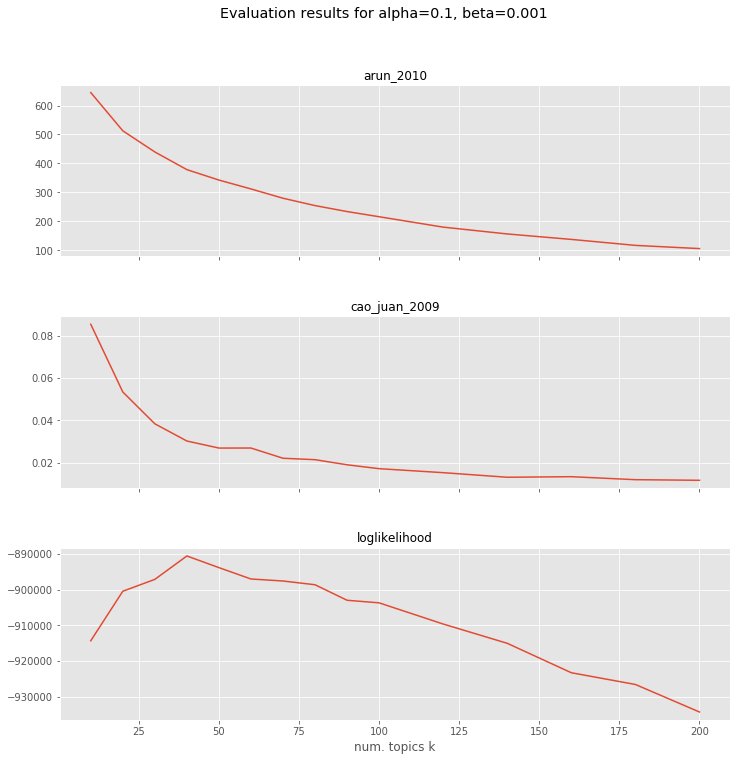

In [26]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 1/(10*k)

In [27]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:n_topics: 120
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:n_topics: 20
INFO:lda:n_documents: 23634
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 23634
INFO:lda:n_documents: 23634
INFO:lda:n_words: 120013
INFO:lda:n_documents: 23634
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 12423
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_topics: 60
INFO:lda:n_topics: 40
INFO:lda:n_words: 120013
INFO:lda:vocab_size: 12423
INFO:lda:n_words: 120013
INFO:lda:n_iter: 2000
INFO:lda:n_t

INFO:lda:<40> log likelihood: -908532
INFO:lda:<30> log likelihood: -916180
INFO:lda:<20> log likelihood: -932729
INFO:lda:<60> log likelihood: -908078
INFO:lda:<10> log likelihood: -997864
INFO:lda:<50> log likelihood: -903595
INFO:lda:<10> log likelihood: -998245
INFO:lda:<70> log likelihood: -906557
INFO:lda:<20> log likelihood: -937455
INFO:lda:<30> log likelihood: -907660
INFO:lda:<80> log likelihood: -904699
INFO:lda:<10> log likelihood: -998815
INFO:lda:<40> log likelihood: -906015
INFO:lda:<60> log likelihood: -900901
INFO:lda:<90> log likelihood: -902936
INFO:lda:<20> log likelihood: -939072
INFO:lda:<20> log likelihood: -934832
INFO:lda:<30> log likelihood: -912853
INFO:lda:<100> log likelihood: -902827
INFO:lda:<70> log likelihood: -898652
INFO:lda:<10> log likelihood: -1004892
INFO:lda:<50> log likelihood: -899161
INFO:lda:<110> log likelihood: -901960
INFO:lda:<40> log likelihood: -899416
INFO:lda:<10> log likelihood: -1005757
INFO:lda:<30> log likelihood: -916456
INFO:lda

INFO:lda:<170> log likelihood: -867257
INFO:lda:<260> log likelihood: -875080
INFO:lda:<390> log likelihood: -879927
INFO:lda:<600> log likelihood: -894921
INFO:lda:<200> log likelihood: -869066
INFO:lda:<140> log likelihood: -868660
INFO:lda:<610> log likelihood: -894521
INFO:lda:<120> log likelihood: -873919
INFO:lda:<400> log likelihood: -879952
INFO:lda:<50> log likelihood: -900242
INFO:lda:<270> log likelihood: -874747
INFO:lda:<620> log likelihood: -894403
INFO:lda:<180> log likelihood: -866856
INFO:lda:<90> log likelihood: -877056
INFO:lda:<630> log likelihood: -894861
INFO:lda:<410> log likelihood: -879573
INFO:lda:<210> log likelihood: -869504
INFO:lda:<40> log likelihood: -911857
INFO:lda:<70> log likelihood: -885009
INFO:lda:<640> log likelihood: -894762
INFO:lda:<280> log likelihood: -874124
INFO:lda:<110> log likelihood: -872005
INFO:lda:<420> log likelihood: -878928
INFO:lda:<650> log likelihood: -894919
INFO:lda:<150> log likelihood: -867688
INFO:lda:<90> log likelihood:

INFO:lda:<1110> log likelihood: -893569
INFO:lda:<720> log likelihood: -877640
INFO:lda:<260> log likelihood: -860099
INFO:lda:<380> log likelihood: -865238
INFO:lda:<1120> log likelihood: -894095
INFO:lda:<490> log likelihood: -871015
INFO:lda:<320> log likelihood: -860665
INFO:lda:<1130> log likelihood: -894102
INFO:lda:<730> log likelihood: -877220
INFO:lda:<160> log likelihood: -864983
INFO:lda:<1140> log likelihood: -893440
INFO:lda:<1150> log likelihood: -893758
INFO:lda:<230> log likelihood: -863803
INFO:lda:<740> log likelihood: -877702
INFO:lda:<500> log likelihood: -871186
INFO:lda:<390> log likelihood: -865289
INFO:lda:<1160> log likelihood: -893531
INFO:lda:<130> log likelihood: -868170
INFO:lda:<270> log likelihood: -860217
INFO:lda:<1170> log likelihood: -893567
INFO:lda:<330> log likelihood: -860234
INFO:lda:<170> log likelihood: -866325
INFO:lda:<750> log likelihood: -877354
INFO:lda:<200> log likelihood: -861737
INFO:lda:<1180> log likelihood: -893643
INFO:lda:<510> lo

INFO:lda:<330> log likelihood: -860269
INFO:lda:<1640> log likelihood: -893076
INFO:lda:<470> log likelihood: -858542
INFO:lda:<280> log likelihood: -857143
INFO:lda:<560> log likelihood: -862654
INFO:lda:<1060> log likelihood: -876537
INFO:lda:<380> log likelihood: -857453
INFO:lda:<1650> log likelihood: -893966
INFO:lda:<1660> log likelihood: -893336
INFO:lda:<720> log likelihood: -868612
INFO:lda:<1070> log likelihood: -876864
INFO:lda:<120> log likelihood: -873273
INFO:lda:<570> log likelihood: -862644
INFO:lda:<1670> log likelihood: -893831
INFO:lda:<230> log likelihood: -859009
INFO:lda:<1080> log likelihood: -876837
INFO:lda:<730> log likelihood: -868618
INFO:lda:<1680> log likelihood: -893395
INFO:lda:<480> log likelihood: -858643
INFO:lda:<1690> log likelihood: -893533
INFO:lda:<340> log likelihood: -859896
INFO:lda:<250> log likelihood: -859326
INFO:lda:<290> log likelihood: -855435
INFO:lda:<1090> log likelihood: -876093
INFO:lda:<390> log likelihood: -856958
INFO:lda:<1700>

INFO:lda:<950> log likelihood: -867948
INFO:lda:<440> log likelihood: -858230
INFO:lda:<1400> log likelihood: -875752
INFO:lda:<330> log likelihood: -855666
INFO:lda:<760> log likelihood: -861342
INFO:lda:<160> log likelihood: -866005
INFO:lda:<1410> log likelihood: -875560
INFO:lda:<630> log likelihood: -857189
INFO:lda:<960> log likelihood: -867897
INFO:lda:<180> log likelihood: -865044
INFO:lda:<510> log likelihood: -855229
INFO:lda:<380> log likelihood: -853491
INFO:lda:<210> log likelihood: -858836
INFO:lda:<1420> log likelihood: -875806
INFO:lda:<770> log likelihood: -861396
INFO:lda:<970> log likelihood: -867580
INFO:lda:<450> log likelihood: -857080
INFO:lda:<1430> log likelihood: -875488
INFO:lda:<640> log likelihood: -856885
INFO:lda:<310> log likelihood: -854962
INFO:lda:<1440> log likelihood: -875364
INFO:lda:<520> log likelihood: -855251
INFO:lda:<980> log likelihood: -868175
INFO:lda:<780> log likelihood: -861364
INFO:lda:<1450> log likelihood: -875999
INFO:lda:<250> log 

INFO:lda:<990> log likelihood: -860171
INFO:lda:<500> log likelihood: -850894
INFO:lda:<1810> log likelihood: -875506
INFO:lda:<400> log likelihood: -852238
INFO:lda:<1820> log likelihood: -875224
INFO:lda:<1260> log likelihood: -865803
INFO:lda:<830> log likelihood: -855194
INFO:lda:<670> log likelihood: -855013
INFO:lda:<1000> log likelihood: -860192
INFO:lda:<1830> log likelihood: -875227
INFO:lda:<190> log likelihood: -863809
INFO:lda:<590> log likelihood: -855293
INFO:lda:<440> log likelihood: -852501
INFO:lda:<1270> log likelihood: -866382
INFO:lda:<240> log likelihood: -859818
INFO:lda:<1840> log likelihood: -875350
INFO:lda:<1010> log likelihood: -860279
INFO:lda:<840> log likelihood: -855984
INFO:lda:<280> log likelihood: -853440
INFO:lda:<1850> log likelihood: -875513
INFO:lda:<330> log likelihood: -852967
INFO:lda:<510> log likelihood: -851196
INFO:lda:<1280> log likelihood: -865546
INFO:lda:<680> log likelihood: -855087
INFO:lda:<410> log likelihood: -851616
INFO:lda:<1860>

INFO:lda:<270> log likelihood: -854884
INFO:lda:<240> log likelihood: -859133
INFO:lda:<410> log likelihood: -850528
INFO:lda:<1040> log likelihood: -854596
INFO:lda:<850> log likelihood: -853817
INFO:lda:<1600> log likelihood: -865659
INFO:lda:<740> log likelihood: -853800
INFO:lda:<550> log likelihood: -849651
INFO:lda:<510> log likelihood: -849564
INFO:lda:<1260> log likelihood: -859375
INFO:lda:<350> log likelihood: -850636
INFO:lda:<1610> log likelihood: -865578
INFO:lda:<640> log likelihood: -849082
INFO:lda:<1050> log likelihood: -854902
INFO:lda:<1620> log likelihood: -866117
INFO:lda:<860> log likelihood: -853991
INFO:lda:<1270> log likelihood: -860163
INFO:lda:<750> log likelihood: -853563
INFO:lda:<1630> log likelihood: -865716
INFO:lda:<560> log likelihood: -849586
INFO:lda:<1280> log likelihood: -859369
INFO:lda:<1060> log likelihood: -854875
INFO:lda:<420> log likelihood: -849955
INFO:lda:<870> log likelihood: -854243
INFO:lda:<1640> log likelihood: -865258
INFO:lda:<650>

INFO:lda:<680> log likelihood: -850041
INFO:lda:<910> log likelihood: -853385
INFO:lda:<1980> log likelihood: -864224
INFO:lda:<1550> log likelihood: -859294
INFO:lda:<1280> log likelihood: -854422
INFO:lda:<1990> log likelihood: -864600
INFO:lda:<1060> log likelihood: -851833
INFO:lda:<1560> log likelihood: -859280
INFO:lda:<1999> log likelihood: -864432
INFO:lda:<790> log likelihood: -847558
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -864600.323165
INFO:lda:<920> log likelihood: -853020
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.063512
INFO:lda:<510> log likelihood: -848230
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 458.087340
INFO:lda:<630> log likelihood: -848281
INFO:lda:<1290> log likelihood: -853670
INFO:lda:<690> log likelihood: -849232
INFO:lda:<1570> log likelihood: -858931
INFO:lda:<1070> log likelihood: -851844
INFO:lda:<300> log likelihood: -854588
INFO:lda:<1580> log likelihood: -858999
INFO:lda:<1300> log likel

INFO:lda:<840> log likelihood: -848827
INFO:lda:<1110> log likelihood: -851876
INFO:lda:<530> log likelihood: -846864
INFO:lda:<620> log likelihood: -846947
INFO:lda:<1910> log likelihood: -859259
INFO:lda:<1300> log likelihood: -851007
INFO:lda:<1570> log likelihood: -853453
INFO:lda:<770> log likelihood: -847480
INFO:lda:<970> log likelihood: -846538
INFO:lda:<460> log likelihood: -847878
INFO:lda:<1920> log likelihood: -859237
INFO:lda:<410> log likelihood: -849370
INFO:lda:<1120> log likelihood: -851102
INFO:lda:<850> log likelihood: -848444
INFO:lda:<1580> log likelihood: -853539
INFO:lda:<1310> log likelihood: -851472
INFO:lda:<1930> log likelihood: -859307
INFO:lda:<1590> log likelihood: -854137
INFO:lda:<540> log likelihood: -846431
INFO:lda:<1940> log likelihood: -858816
INFO:lda:<980> log likelihood: -846476
INFO:lda:<1130> log likelihood: -851547
INFO:lda:<1320> log likelihood: -851847
INFO:lda:<630> log likelihood: -845868
INFO:lda:<780> log likelihood: -847206
INFO:lda:<86

INFO:lda:<1170> log likelihood: -846213
INFO:lda:<1350> log likelihood: -851295
INFO:lda:<1570> log likelihood: -850769
INFO:lda:<440> log likelihood: -849493
INFO:lda:<930> log likelihood: -846096
INFO:lda:<1910> log likelihood: -853413
INFO:lda:<1030> log likelihood: -847572
INFO:lda:<650> log likelihood: -844552
INFO:lda:<1360> log likelihood: -850628
INFO:lda:<1580> log likelihood: -850870
INFO:lda:<1180> log likelihood: -846301
INFO:lda:<1920> log likelihood: -852828
INFO:lda:<760> log likelihood: -844397
INFO:lda:<560> log likelihood: -845821
INFO:lda:<940> log likelihood: -846604
INFO:lda:<500> log likelihood: -847233
INFO:lda:<1930> log likelihood: -852872
INFO:lda:<1590> log likelihood: -850506
INFO:lda:<1370> log likelihood: -850878
INFO:lda:<1040> log likelihood: -847343
INFO:lda:<1190> log likelihood: -845860
INFO:lda:<1940> log likelihood: -852396
INFO:lda:<1600> log likelihood: -851093
INFO:lda:<660> log likelihood: -844666
INFO:lda:<1380> log likelihood: -851065
INFO:lda

INFO:lda:<910> log likelihood: -843742
INFO:lda:<1420> log likelihood: -844762
INFO:lda:<1910> log likelihood: -850828
INFO:lda:<1640> log likelihood: -849690
INFO:lda:<1130> log likelihood: -845347
INFO:lda:<1250> log likelihood: -846445
INFO:lda:<600> log likelihood: -845168
INFO:lda:<790> log likelihood: -843360
INFO:lda:<1430> log likelihood: -844990
INFO:lda:<1920> log likelihood: -850931
INFO:lda:<1650> log likelihood: -850461
INFO:lda:<920> log likelihood: -843329
INFO:lda:<680> log likelihood: -843324
INFO:lda:<1140> log likelihood: -844731
INFO:lda:<1930> log likelihood: -850348
INFO:lda:<1260> log likelihood: -846747
INFO:lda:<1440> log likelihood: -844599
INFO:lda:<1660> log likelihood: -849549
INFO:lda:<540> log likelihood: -847003
INFO:lda:<1940> log likelihood: -850336
INFO:lda:<800> log likelihood: -843350
INFO:lda:<930> log likelihood: -842819
INFO:lda:<1270> log likelihood: -846736
INFO:lda:<1670> log likelihood: -850119
INFO:lda:<1150> log likelihood: -844504
INFO:lda

INFO:lda:<1720> log likelihood: -843670
INFO:lda:<1110> log likelihood: -842043
INFO:lda:<1370> log likelihood: -844674
INFO:lda:<1990> log likelihood: -849323
INFO:lda:<820> log likelihood: -841911
INFO:lda:<1520> log likelihood: -845387
INFO:lda:<1730> log likelihood: -844406
INFO:lda:<650> log likelihood: -844967
INFO:lda:<1999> log likelihood: -849175
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -849323.094039
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.046945
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 316.904106
INFO:lda:<960> log likelihood: -841623
INFO:lda:<1380> log likelihood: -844705
INFO:lda:<1120> log likelihood: -841036
INFO:lda:<730> log likelihood: -842134
INFO:lda:<1740> log likelihood: -844266
INFO:lda:<1530> log likelihood: -845720
INFO:lda:<830> log likelihood: -840883
INFO:lda:<1390> log likelihood: -844172
INFO:lda:<1750> log likelihood: -844033
INFO:lda:<1130> log likelihood: -841753
INFO:lda:<970> log lik

INFO:lda:<1860> log likelihood: -845618
INFO:lda:<1170> log likelihood: -839979
INFO:lda:<1370> log likelihood: -840845
INFO:lda:<890> log likelihood: -840814
INFO:lda:<1690> log likelihood: -843691
INFO:lda:<1870> log likelihood: -845177
INFO:lda:<800> log likelihood: -842814
INFO:lda:<1380> log likelihood: -840567
INFO:lda:<1020> log likelihood: -839360
INFO:lda:<1700> log likelihood: -843531
INFO:lda:<1180> log likelihood: -840318
INFO:lda:<1880> log likelihood: -844829
INFO:lda:<900> log likelihood: -840689
INFO:lda:<1390> log likelihood: -840599
INFO:lda:<1710> log likelihood: -844161
INFO:lda:<1890> log likelihood: -844830
INFO:lda:<1190> log likelihood: -840269
INFO:lda:<1030> log likelihood: -839473
INFO:lda:<810> log likelihood: -843206
INFO:lda:<1400> log likelihood: -840757
INFO:lda:<1720> log likelihood: -843484
INFO:lda:<1900> log likelihood: -844900
INFO:lda:<910> log likelihood: -840704
INFO:lda:<1910> log likelihood: -845433
INFO:lda:<1200> log likelihood: -839572
INFO:

INFO:lda:<1760> log likelihood: -839362
INFO:lda:<1020> log likelihood: -839473
INFO:lda:<1500> log likelihood: -838574
INFO:lda:<1300> log likelihood: -837096
INFO:lda:<1150> log likelihood: -837954
INFO:lda:<1770> log likelihood: -840179
INFO:lda:<1510> log likelihood: -838598
INFO:lda:<1030> log likelihood: -840352
INFO:lda:<1310> log likelihood: -837285
INFO:lda:<1780> log likelihood: -839851
INFO:lda:<1160> log likelihood: -838605
INFO:lda:<1520> log likelihood: -838418
INFO:lda:<1790> log likelihood: -839249
INFO:lda:<1320> log likelihood: -837399
INFO:lda:<1040> log likelihood: -839933
INFO:lda:<1170> log likelihood: -838323
INFO:lda:<1530> log likelihood: -838357
INFO:lda:<1800> log likelihood: -840068
INFO:lda:<1330> log likelihood: -836940
INFO:lda:<1050> log likelihood: -839635
INFO:lda:<1810> log likelihood: -839520
INFO:lda:<1540> log likelihood: -838530
INFO:lda:<1180> log likelihood: -838331
INFO:lda:<1340> log likelihood: -837298
INFO:lda:<1820> log likelihood: -839692


INFO:lda:<1530> log likelihood: -835963
INFO:lda:<1750> log likelihood: -836578
INFO:lda:<1370> log likelihood: -837778
INFO:lda:<1760> log likelihood: -836062
INFO:lda:<1540> log likelihood: -835931
INFO:lda:<1380> log likelihood: -837388
INFO:lda:<1770> log likelihood: -836242
INFO:lda:<1550> log likelihood: -836252
INFO:lda:<1780> log likelihood: -836001
INFO:lda:<1390> log likelihood: -837272
INFO:lda:<1560> log likelihood: -836056
INFO:lda:<1790> log likelihood: -835858
INFO:lda:<1400> log likelihood: -837055
INFO:lda:<1570> log likelihood: -836215
INFO:lda:<1800> log likelihood: -835634
INFO:lda:<1580> log likelihood: -835798
INFO:lda:<1410> log likelihood: -837285
INFO:lda:<1810> log likelihood: -835878
INFO:lda:<1590> log likelihood: -835564
INFO:lda:<1420> log likelihood: -837229
INFO:lda:<1820> log likelihood: -836160
INFO:lda:<1600> log likelihood: -836289
INFO:lda:<1830> log likelihood: -836062
INFO:lda:<1430> log likelihood: -836897
INFO:lda:<1610> log likelihood: -836151


plotting evaluation results


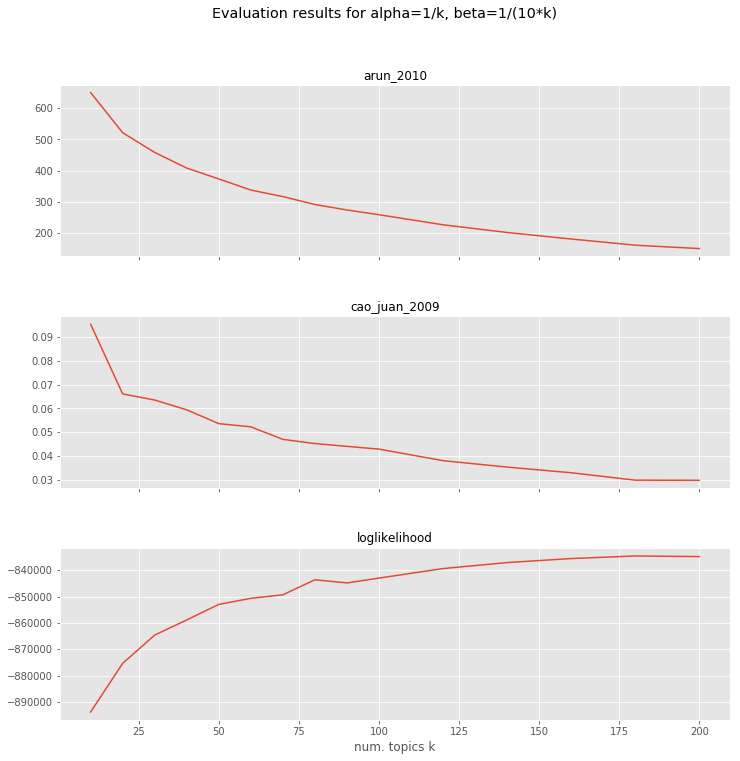

In [28]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 60 / alpha: 1/k / beta: 0.1

In [34]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=60, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=1/60, eta=0.1)

In [35]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')
(1, '0.019*"nascem" + 0.017*"bebes" + 0.013*"dois" + 0.011*"suspeita" + 0.010*"mosquitos"')
(2, '0.018*"pouco" + 0.018*"recebem" + 0.014*"kkkkk" + 0.014*"bebês" + 0.012*"óculos"')
(3, '0.019*"maioria" + 0.018*"política" + 0.014*"brasileiros" + 0.013*"vacinas" + 0.013*"crise"')
(4, '0.037*"primeira" + 0.015*"brasileira" + 0.014*"modelo" + 0.013*"mundo" + 0.009*"pode"')
(5, '0.135*"caso" + 0.092*"zika" + 0.061*"primeiro" + 0.024*"bebê" + 0.022*"vírus"')
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')
(7, '0.026*"gente" + 0.015*"nascidos" + 0.015*"recém" + 0.015*"dessa" + 0.014*"piada"')
(8, '0.061*"acho" + 0.035*"cérebro" + 0.023*"problema" + 0.015*"ainda" + 0.013*"pode"')
(9, '0.021*"acha" + 0.009*"doença" + 0.009*"pessoal" + 0.008*"agora" + 0.007*"atendimentos"')
(10, '0.036*"mutirão" + 0.027*"crianças" + 0.021*"hospital" + 0.019*"parecendo" + 0.010*"difi

In [36]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 21):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')

meu isso de microcefalia me dá uma dor


"SOCORRO!!! Zika, microcefalia, dengue, inflação, desemprego, desajuste fiscal, juros altos, alta de impostos,... https://t.co/kkYwU14HH9


https://t.co/T2Oh55tpYj   Vacina contra a Gripe Suína é a Verdadeira Causadora da        Microcefalia. Cuidado com as Vacinas. Veja Vídeo


https://t.co/eY3CmtYxXG Algo me diz que esse pedido do MPF/MG tem a ver com o surto de microcefalia. Só acho.


Mais dois mitos sobre zika e microcefalia: vacina HPV e haitianos: https://t.co/KO0b4OATnz #twitciencia


Vocês preferem ver uma criança sofrer e padecer de dor do que legalizar o aborto em casos como esse de microcefalia?


@Denise_apm @ClubeAntiPT 
No caso dessa vacinação nas gestantes, não significa que 100% das vacinadas terão feto com microcefalia.


@senhoritaelza https://t.co/7uAsZpvNyh tem outros sites tbm, jogando 'microcefalia vacina rubeola' no gugou temo

Mais de 3k de grávidas na Colômbia diagnosticadas com zika vírus: nenhum bebê com microcefalia. 

E o medo de tomar as vacina?




-----------


topico: 6
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')

#Zika #Microcefalia OMS alerta: é mais seguro não engravidar.https://t.co/82ko6Lb7SX #SaúdePública #Dengue #Epidemia https://t.co/8lEo5VXdkK


Município de São Bento em alerta contra Zica, Dengue e Microcefalia https://t.co/AJbrxpiHno https://t.co/XOSFbSuk6U


@Nubobot42 microcefalia quando nenhuma grávida toma vacina contra rubéola durante a gravidez)


@jornalnacional Enquanto tratam de dengue e microcefalia, os comunistas das FFAA estão ganhando terreno e angariando a simpatia do Militares


SUS ABANDONADO E ROUBADO PELO @ptbrasil
#TEMPORÃO
#HUMBERTOCOSTA
#PADILHA
A DENGUE EXPLODIU!
VEIO O #ZIKA A #MICROCEFALIAdoPT  #OsFILHOSdoPT


@folha Nunca vi uma Mãe infectada com Dengue gerar uma criança com problemas mais graves que uma Microcefa

UMA PERGUNTINHA @_mariadorosario  

EM QUE GOVERNO MESMO OS CASOS DE DENGUE E MICROCEFALIA AUMENTARAM?

 https://t.co/PALczHe4Pb




-----------


topico: 12
(12, '0.025*"tema" + 0.014*"tava" + 0.013*"fico" + 0.010*"redação" + 0.008*"estadual"')

perdi um irmão vítima de microcefalia, não consigo imaginar a dor dos meus pais em ver essa reportagem do Fantástico :'(


AO VIVO: Secretário do @minsaude fala dos três eixos ao combate à #dengue e #microcefalia https://t.co/SHC5BZJ3Oi


Microcefalia assusta mais que câncer e aids, reconhece secretário estadual da Saúde
@samuelvettori @RdGuaibaOficial


@WillianMar ppr isso q eu so pego gente com microcefalia


Lara estevos parabéns você é a microcefalia


Campanha da Fraternidade 2016, esse é o tema do #CaminhoscomPeJuarez , ás 22h, tudo sobre a  polêmica do aborto  com ref. a microcefalia.


R7 Mãe de gêmeos em que um tem microcefalia diz: "Tem dia que fico pensando por que um teve e outro não" R7 Lucas e… https://t.co/cOWb3t9AWC


508 caso

@VEJA Justo no momento que o Brasil está enfrentando uma epidemia de dengue, zika vírus e microcefalia? Alô MPF, tomem providências!


@samantapersotti @ro_vanja @JorgeXiada O Dr. Plínio diz que casos de microcefalia correspondem com vacinação de grávidas e mulheres férteis.


Rotas de entrada do ... - https://t.co/pCfyU5IAao  #biologia #zika #nomeiodaterra #dengue #microcefalia #olimpiadas https://t.co/xgc6RbSepe


Alguém já leu isso? Microcefalia devido a vírus da copa 2014 ou vacina da copa 2014?... https://t.co/obRBNQ5VPe


#OMS prevê testes de #vacina #antizika no mínimo em 18 meses https://t.co/qRpntpe9Bz #mosquito #Aedesaegypti #doença #saúde #microcefalia




-----------


topico: 18
(18, '0.096*"filho" + 0.023*"ajuda" + 0.017*"abortar" + 0.016*"cuidar" + 0.015*"criança"')

@Aetano foda! Aids, microcefalia, inflação alta...


Tava vendo bem estar e as criancas com microcefalia, meu é muito triste ver um bebê assim, já é ruim ver criança com gripe imagina


Tô com medo de pesqui